# Project

##<span id="1"></span> ** 1. Overview **


Input Variables:

### 1 Model :	
- **4WD/4X4 = Four-wheel drive							 
- **AWD = All-wheel drive
- **CNG = Compressed natural gas 
- **FFV = Flexible-fuel vehicle
- **NGV = Natural gas vehicle
- **SWB = Short wheelbase
- **LWB = Long wheelbase
- **EWB = Extended wheelbase
- **# = High output engine that provides more power than the standard engine of the same size							
### 2. Transmission :
- ** A = automatic
- **AM = automated manual
- **AS = automatic with select shift
- **AV = continuously variable
- **M = manual
- **3 – 10 = Number of gears
### 3. Fuel type :
- **X = regular gasoline
- **Z = premium gasoline
- **D = diesel
- **E = ethanol (E85)
- **N = natural gas
### Fuel Consumption :	
- **City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)							
### CO2 Emissions (g/km) : 
- **Estimated tailpipe carbon dioxide emissions (in grams per kilometre) are based on fuel type and the combined fuel consumption rating.	


## <span id="2"></span> ** 2. Importing Libraries and Reading the Dataset **

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport 
import plotly.express as px
import plotly.graph_objects as go 

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Carbon Emission Rating/Carbon Emission.csv")

In [ ]:
data.head()

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE(L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.6,8.3,10.1,28,232
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,11.0,8.3,9.8,29,225
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4,M5,Z,10.8,8.3,9.7,29,223
3,1995,ACURA,LEGEND,COMPACT,3.2,6,A4,Z,14.2,10.5,12.5,23,288
4,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6,A4,Z,14.6,11.0,13.0,22,299


In [ ]:
# data.tail()

In [ ]:
data.columns

Index(['MODEL YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE(L)',
       'CYLINDERS', 'TRANSMISSION', 'FUEL TYPE',
       'FUEL CONSUMPTION CITY (L/100 km)', 'FUEL CONSUMPTION HWY (L/100 km)',
       'FUEL CONSUMPTION COMB (L/100 km)', 'FUEL CONSUMPTION COMB (mpg)',
       'CO2 EMISSIONS '],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25112 entries, 0 to 25111
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   MODEL YEAR                        25112 non-null  int64  
 1   MAKE                              25112 non-null  object 
 2   MODEL                             25112 non-null  object 
 3   VEHICLE CLASS                     25112 non-null  object 
 4   ENGINE SIZE(L)                    25112 non-null  float64
 5   CYLINDERS                         25112 non-null  int64  
 6   TRANSMISSION                      25112 non-null  object 
 7   FUEL TYPE                         25112 non-null  object 
 8   FUEL CONSUMPTION CITY (L/100 km)  25112 non-null  float64
 9   FUEL CONSUMPTION HWY (L/100 km)   25112 non-null  float64
 10  FUEL CONSUMPTION COMB (L/100 km)  25112 non-null  float64
 11  FUEL CONSUMPTION COMB (mpg)       25112 non-null  int64  
 12  CO2 

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MODEL YEAR,25112.0,2009.099992,7.472648,1995.0,2003.0,2010.0,2015.0,2021.0
ENGINE SIZE(L),25112.0,3.361023,1.340431,0.8,2.3,3.0,4.3,8.4
CYLINDERS,25112.0,5.849833,1.790206,2.0,4.0,6.0,8.0,16.0
FUEL CONSUMPTION CITY (L/100 km),25112.0,13.053835,3.560387,3.5,10.6,12.6,15.1,30.6
FUEL CONSUMPTION HWY (L/100 km),25112.0,9.153230,2.400678,3.2,7.4,8.7,10.5,20.9
FUEL CONSUMPTION COMB (L/100 km),25112.0,11.299387,2.999837,3.6,9.2,10.8,13.0,26.1
FUEL CONSUMPTION COMB (mpg),25112.0,26.771265,7.291094,11.0,22.0,26.0,31.0,78.0
CO2 EMISSIONS,25112.0,256.525765,62.946882,83.0,212.0,248.0,297.0,608.0


##### 1. There are total 25,111 row/samples and 13 columns/features.

##### 2. 12 of the features are independent variable and one is dependent variable

##### 3. 5 of the 13 column are of object datatype, 4 integer and 4 are float type.

##### 4. We can see that there are total 8 columns with numerical values and other 5 have character values.

##### 5. The columns Engine Size(L), Cylinders, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km), Fuel Consumption Comb (mpg) and CO2 Emissions(g/km) are numerical and continuous in nature.

##### 6. The columns Make, Model, Vehicle Class, Transmission and Fuel Type are categorical in nature

## <span id="3"></span> ** 3. Data Visualization and Preprocessing **

In [ ]:
data.shape

(25112, 13)

In [ ]:
data.nunique()

MODEL YEAR                            27
MAKE                                  90
MODEL                               4548
VEHICLE CLASS                         32
ENGINE SIZE(L)                        63
CYLINDERS                              9
TRANSMISSION                          30
FUEL TYPE                              5
FUEL CONSUMPTION CITY (L/100 km)     235
FUEL CONSUMPTION HWY (L/100 km)      154
FUEL CONSUMPTION COMB (L/100 km)     195
FUEL CONSUMPTION COMB (mpg)           59
CO2 EMISSIONS                        371
dtype: int64

### Checking For Missing Data

In [ ]:
data.isnull().sum()

MODEL YEAR                          0
MAKE                                0
MODEL                               0
VEHICLE CLASS                       0
ENGINE SIZE(L)                      0
CYLINDERS                           0
TRANSMISSION                        0
FUEL TYPE                           0
FUEL CONSUMPTION CITY (L/100 km)    0
FUEL CONSUMPTION HWY (L/100 km)     0
FUEL CONSUMPTION COMB (L/100 km)    0
FUEL CONSUMPTION COMB (mpg)         0
CO2 EMISSIONS                       0
dtype: int64

In [ ]:
data[data.isnull().any(axis=1)]

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE(L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS


### Relationship Analysis

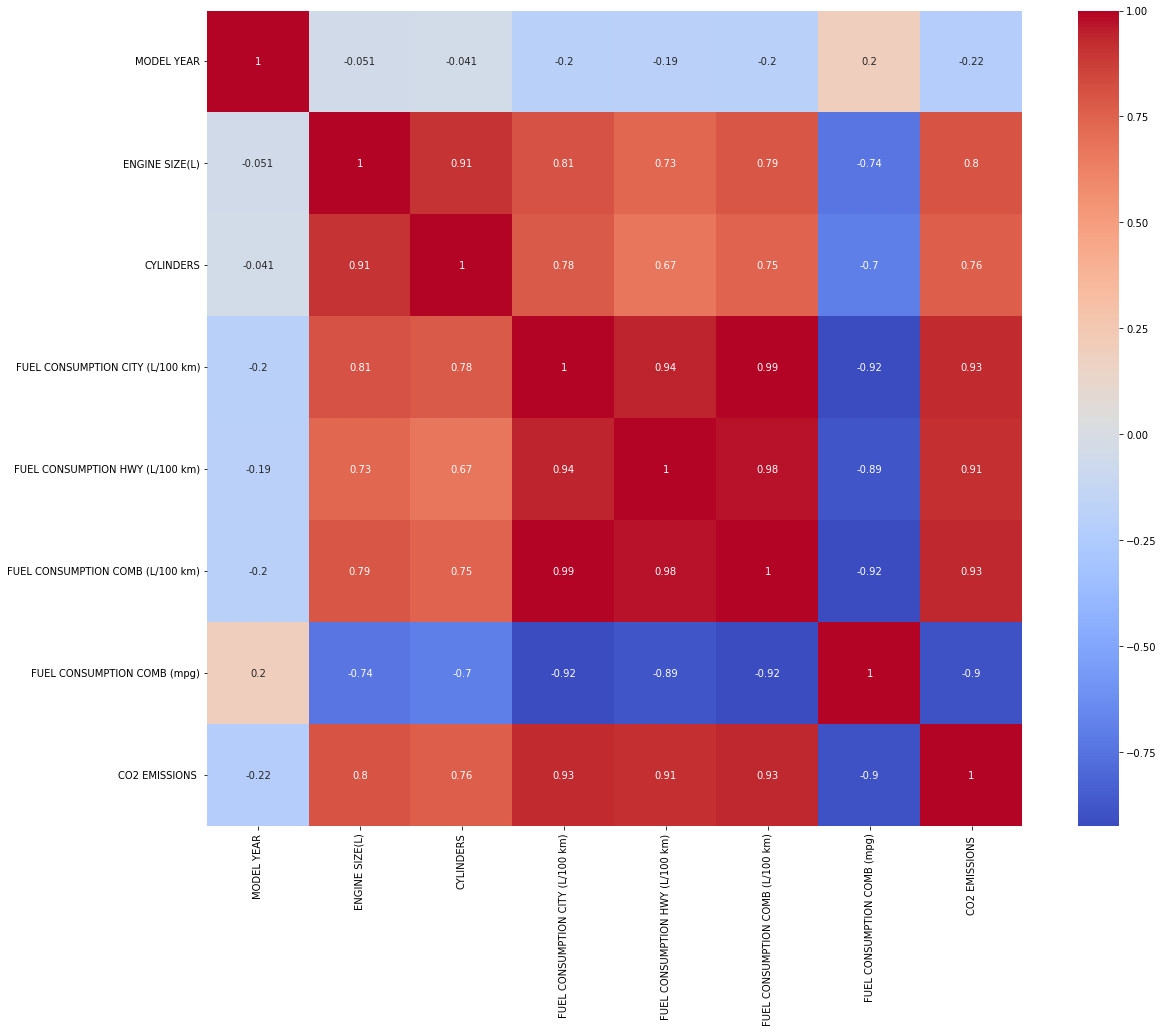

In [ ]:
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(20,15))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, cmap= 'coolwarm', square=True)
#show plot
plt.show() 

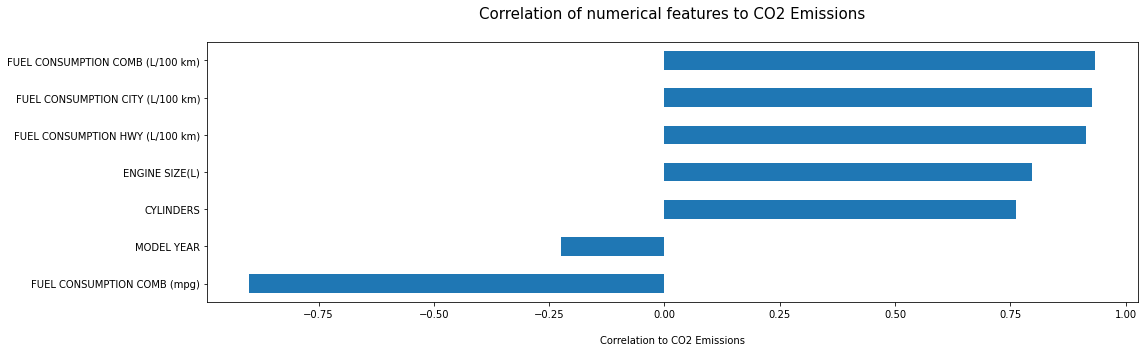

In [ ]:
plt.figure(figsize=(16,5))
corr["CO2 EMISSIONS "].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to CO2 Emissions\n", fontsize=15)
plt.xlabel("\nCorrelation to CO2 Emissions")
plt.tight_layout()
plt.show()

##### 1. Fuel Consumption Comb (mpg=miles per galon) is negatively correlated to all the features.

##### 2. All the other features are postively correlated with each other.

##### 3. Both Fuel Consumption City (L/100 km) and Fuel Consumption Hwy (L/100 km) have very strong positive correlation of 0.99 and 0.98 with Fuel Consumption Comb (L/100 km), since Fuel Consumption Comb (L/100 km) is redundant.

##### 4. Our dependent variable CO2 Emissions has highest positive correlation of 0.93 with Fuel Consumption City (L/100 km) and Fuel Consumption Comb (L/100 km) and strong negative correlation of -0.9 with Fuel Consumption Comb (mpg).

###  Categorical Data (Object types)

In [ ]:
data.dtypes

MODEL YEAR                            int64
MAKE                                 object
MODEL                                object
VEHICLE CLASS                        object
ENGINE SIZE(L)                      float64
CYLINDERS                             int64
TRANSMISSION                         object
FUEL TYPE                            object
FUEL CONSUMPTION CITY (L/100 km)    float64
FUEL CONSUMPTION HWY (L/100 km)     float64
FUEL CONSUMPTION COMB (L/100 km)    float64
FUEL CONSUMPTION COMB (mpg)           int64
CO2 EMISSIONS                         int64
dtype: object

In [ ]:
data["MAKE"]=data["MAKE"].str.upper()  

In [ ]:
data["MAKE"].nunique()

55

In [ ]:
data["MAKE"].unique()

array(['ACURA', 'ALFA ROMEO', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'EAGLE', 'FERRARI',
       'FORD', 'GEO', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'ISUZU',
       'JAGUAR', 'JEEP', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MAZDA',
       'MERCEDES-BENZ', 'MERCURY', 'NISSAN', 'OLDSMOBILE', 'PLYMOUTH',
       'PONTIAC', 'PORSCHE', 'ROLLS-ROYCE', 'SAAB', 'SATURN', 'SUBARU',
       'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'DAEWOO', 'KIA',
       'MASERATI', 'MINI', 'MITSUBISHI', 'SMART', 'HUMMER',
       'ASTON MARTIN', 'LAMBORGHINI', 'BUGATTI', 'SCION', 'FIAT', 'RAM',
       'SRT', 'GENESIS'], dtype=object)

In [ ]:
data["MAKE"].value_counts()

CHEVROLET        2419
FORD             2018
BMW              1561
GMC              1548
MERCEDES-BENZ    1317
DODGE            1212
TOYOTA           1136
PORSCHE           937
NISSAN            844
VOLKSWAGEN        835
AUDI              813
MAZDA             718
HONDA             620
VOLVO             588
HYUNDAI           585
JEEP              577
SUBARU            574
KIA               507
CHRYSLER          488
LEXUS             456
CADILLAC          433
PONTIAC           390
MINI              386
JAGUAR            385
BUICK             318
MITSUBISHI        315
INFINITI          293
ACURA             288
SUZUKI            260
SAAB              252
LINCOLN           232
SATURN            216
LAND ROVER        173
BENTLEY           141
RAM               137
MASERATI          112
ROLLS-ROYCE       112
ASTON MARTIN      101
LAMBORGHINI       100
FERRARI            88
PLYMOUTH           88
FIAT               84
OLDSMOBILE         79
MERCURY            57
ISUZU              47
SCION     

In [ ]:
data["MODEL"]=data["MODEL"].str.upper()  

In [ ]:
data["MODEL"].nunique()

4038

In [ ]:
data["MODEL"].unique()

array(['INTEGRA', 'INTEGRA GS-R', 'LEGEND', ..., 'RAV4 (STOP/START)',
       'RAV4 AWD (STOP/START)', 'RAV4 AWD LE'], dtype=object)

In [ ]:
data["MODEL"].value_counts()

MUSTANG                   123
JETTA                     101
RANGER                     88
COROLLA                    84
F150                       81
                         ... 
G15/G25 VANDURA DIESEL      1
RX 400H 4X4                 1
RS 5 CABRIOLET              1
Q7 TDI (MODIFIED)           1
RAV4 AWD LE                 1
Name: MODEL, Length: 4038, dtype: int64

In [ ]:
data['VEHICLE CLASS'].value_counts()

COMPACT                     3207
SUV                         3036
MID-SIZE                    2715
PICKUP TRUCK - STANDARD     2278
SUBCOMPACT                  2066
FULL-SIZE                   1256
TWO-SEATER                  1106
MINICOMPACT                  858
SUV - SMALL                  827
STATION WAGON - SMALL        810
SUV: Small                   731
MINIVAN                      556
Mid-size                     543
SUV - STANDARD               514
PICKUP TRUCK - SMALL         470
VAN - CARGO                  469
STATION WAGON - MID-SIZE     466
SUV: Standard                459
Compact                      418
Pickup truck: Standard       402
VAN - PASSENGER              386
Subcompact                   372
Full-size                    353
Two-seater                   258
Minicompact                  162
Station wagon: Small         121
Pickup truck: Small           88
SPECIAL PURPOSE VEHICLE       52
Special purpose vehicle       50
Station wagon: Mid-size       36
Minivan   

In [ ]:
data["VEHICLE CLASS"]=data["VEHICLE CLASS"].str.upper()  

In [ ]:
data["VEHICLE CLASS"] = np.where(data["VEHICLE CLASS"].isin(["STATION WAGON - SMALL", "STATION WAGON: SMALL"]), "STATION WAGON - SMALL", data["VEHICLE CLASS"])
data["VEHICLE CLASS"] = np.where(data["VEHICLE CLASS"].isin(["PICKUP TRUCK - STANDARD", "PICKUP TRUCK: STANDARD"]), "PICKUP TRUCK - STANDARD", data["VEHICLE CLASS"])
data["VEHICLE CLASS"] = np.where(data["VEHICLE CLASS"].isin(["PICKUP TRUCK - SMALL", "PICKUP TRUCK: SMALL"]), "PICKUP TRUCK - SMALL", data["VEHICLE CLASS"])
data["VEHICLE CLASS"] = np.where(data["VEHICLE CLASS"].isin(["VAN - PASSENGER", "VAN: PASSENGER"]), "VAN - PASSENGER", data["VEHICLE CLASS"])
data["VEHICLE CLASS"] = np.where(data["VEHICLE CLASS"].isin(["STATION WAGON - MID-SIZE", "STATION WAGON: MID-SIZE"]), "STATION WAGON - MID-SIZE", data["VEHICLE CLASS"])
data["VEHICLE CLASS"] = np.where(data["VEHICLE CLASS"].isin(["SUV - STANDARD", "SUV: STANDARD"]), "SUV - STANDARD", data["VEHICLE CLASS"])  
data["VEHICLE CLASS"] = np.where(data["VEHICLE CLASS"].isin(["SUV - SMALL", "SUV: SMALL"]), "SUV - SMALL", data["VEHICLE CLASS"])

In [ ]:
vehicle_class= data['VEHICLE CLASS'].value_counts()
vehicle_class

COMPACT                     3625
MID-SIZE                    3258
SUV                         3036
PICKUP TRUCK - STANDARD     2680
SUBCOMPACT                  2438
FULL-SIZE                   1609
SUV - SMALL                 1558
TWO-SEATER                  1364
MINICOMPACT                 1020
SUV - STANDARD               973
STATION WAGON - SMALL        931
MINIVAN                      591
PICKUP TRUCK - SMALL         558
STATION WAGON - MID-SIZE     502
VAN - CARGO                  469
VAN - PASSENGER              398
SPECIAL PURPOSE VEHICLE      102
Name: VEHICLE CLASS, dtype: int64

In [ ]:
data['VEHICLE CLASS'].nunique()

17

In [ ]:
data['VEHICLE CLASS'].unique()

array(['SUBCOMPACT', 'COMPACT', 'TWO-SEATER', 'STATION WAGON - SMALL',
       'MINICOMPACT', 'MID-SIZE', 'FULL-SIZE', 'STATION WAGON - MID-SIZE',
       'VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SUV',
       'MINIVAN', 'PICKUP TRUCK - SMALL', 'SUV - STANDARD',
       'SPECIAL PURPOSE VEHICLE', 'SUV - SMALL'], dtype=object)

In [ ]:
data['TRANSMISSION'].value_counts()

A4      5491
M5      3214
AS6     2797
M6      2601
A6      1941
A5      1604
AS8     1532
AS5      868
AV       773
A8       682
AM7      617
AS7      607
A9       455
A7       277
AS4      258
AS10     245
AM6      204
A3       187
AV7      133
AV6      129
M7       116
AM8      111
AS9       91
A10       90
AV8       55
AV10      17
AM5        6
AM9        4
AV1        4
M4         3
Name: TRANSMISSION, dtype: int64

In [ ]:
data["TRANSMISSION"] = np.where(data["TRANSMISSION"].isin(["A3","A4", "A5", "A6", "A7", "A8", "A9", "A10"]), "Automatic", data["TRANSMISSION"])
data["TRANSMISSION"] = np.where(data["TRANSMISSION"].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]), "Automated Manual", data["TRANSMISSION"])
data["TRANSMISSION"] = np.where(data["TRANSMISSION"].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]), "Automatic with Select Shift", data["TRANSMISSION"])
data["TRANSMISSION"] = np.where(data["TRANSMISSION"].isin(["AV","AV1", "AV6", "AV7", "AV8", "AV10"]), "Continuously Variable", data["TRANSMISSION"])
data["TRANSMISSION"] = np.where(data["TRANSMISSION"].isin(["M4","M5", "M6", "M7"]), "Manual", data["TRANSMISSION"])


In [ ]:
transmission= data['TRANSMISSION'].value_counts()
transmission

Automatic                      10727
Automatic with Select Shift     6398
Manual                          5934
Continuously Variable           1111
Automated Manual                 942
Name: TRANSMISSION, dtype: int64

In [ ]:
data['TRANSMISSION'].nunique()

5

In [ ]:
data['TRANSMISSION'].unique()

array(['Automatic', 'Manual', 'Automatic with Select Shift',
       'Continuously Variable', 'Automated Manual'], dtype=object)

In [ ]:
 data['FUEL TYPE'].value_counts()
       

X    14024
Z     9609
E     1062
D      378
N       39
Name: FUEL TYPE, dtype: int64

In [ ]:
data["FUEL TYPE"] = np.where(data["FUEL TYPE"]=="Z", "Premium Gasoline", data["FUEL TYPE"])
data["FUEL TYPE"] = np.where(data["FUEL TYPE"]=="X", "Regular Gasoline", data["FUEL TYPE"])
data["FUEL TYPE"] = np.where(data["FUEL TYPE"]=="D", "Diesel", data["FUEL TYPE"])
data["FUEL TYPE"] = np.where(data["FUEL TYPE"]=="E", "Ethanol(E85)", data["FUEL TYPE"])
data["FUEL TYPE"] = np.where(data["FUEL TYPE"]=="N", "Natural Gas", data["FUEL TYPE"])


In [ ]:
data['FUEL TYPE'].unique()

array(['Regular Gasoline', 'Premium Gasoline', 'Diesel', 'Natural Gas',
       'Ethanol(E85)'], dtype=object)

In [ ]:
data['FUEL TYPE'].nunique()

5

### Visualizing the Categorical Data

#### 1. Make

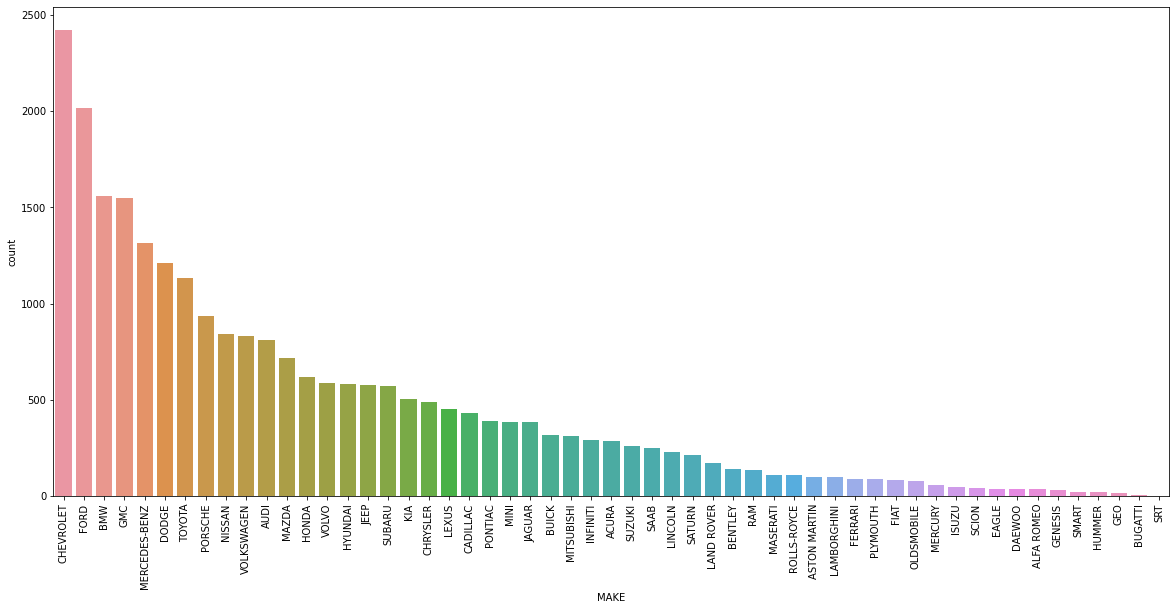

In [ ]:
plt.figure(figsize=(20,9))
sns.countplot(x="MAKE",data=data,order=data["MAKE"].value_counts().index) 
plt.xticks(rotation=90)
plt.show()

In [ ]:
new_df = data["MAKE"].value_counts().rename_axis("MAKE").reset_index(name='counts')

fig = px.bar(new_df, x="MAKE", y="counts", color="counts", title="Car Make Distribution")
fig.show()

In [ ]:
# plt.figure(figsize=(15,7))
# sns.countplot(x="MODEL",data=data,order=data["MODEL"].value_counts().index) 
# plt.xticks(rotation=90)
# plt.show()

#### 2. Model

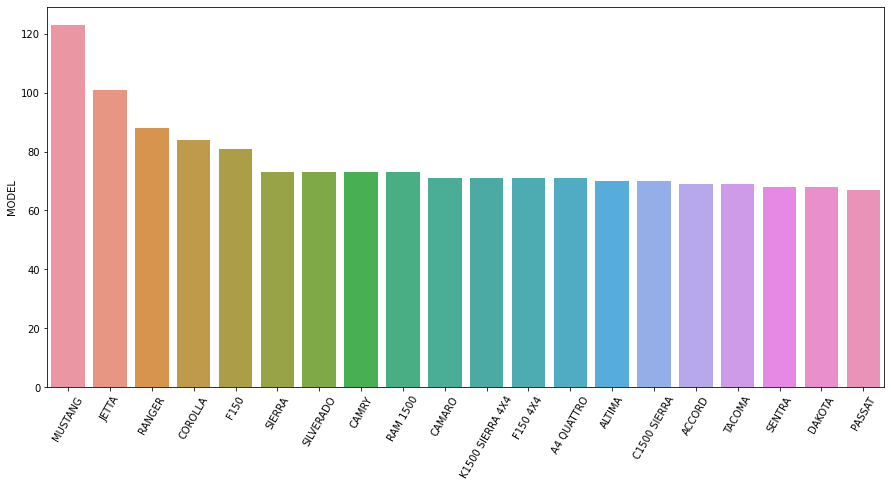

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=data["MODEL"].value_counts()[:20].index, y=data["MODEL"].value_counts()[:20])
plt.xticks(rotation=60)
plt.show()

In [ ]:
model = data["MODEL"].value_counts().rename_axis("MODEL").reset_index(name='counts')

fig = px.bar(model, x="MODEL", y="counts", color="counts", title="Car Models")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(
        go.Bar( 
            x = list((data['MODEL'].value_counts()).index),
            y = (data['MODEL'].value_counts())[:20]
        
        ))

fig.show()

####  3. Vehicle Class

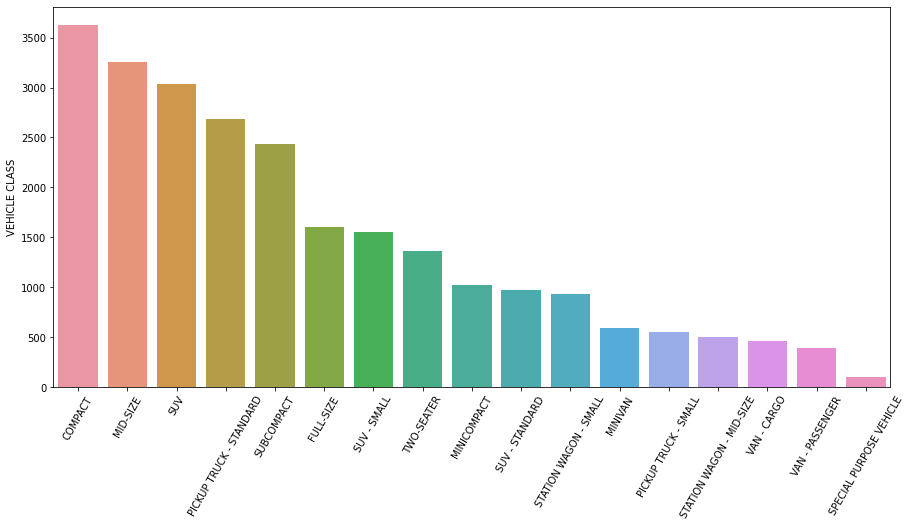

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=data["VEHICLE CLASS"].value_counts()[:20].index, y=data["VEHICLE CLASS"].value_counts()[:20])
plt.xticks(rotation=60)
plt.show()

In [ ]:
trace = go.Bar(x=data["VEHICLE CLASS"].value_counts()[:20].index, y=data["VEHICLE CLASS"].value_counts()[:20])
my_layout = {
    'title': 'Top 20 Vehicle Class',
    'title_x': 0.5,
    'xaxis': {'title': 'Vehicle Class'},
    'yaxis': {'title': 'counts'},
}

fig = go.Figure(data=trace, layout=my_layout)
fig.show()

#### 4. Transmission

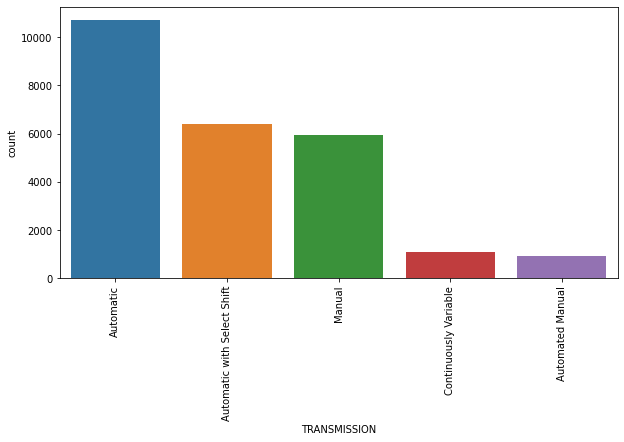

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="TRANSMISSION",data=data,order=data["TRANSMISSION"].value_counts().index) 
plt.xticks(rotation=90)
plt.show()

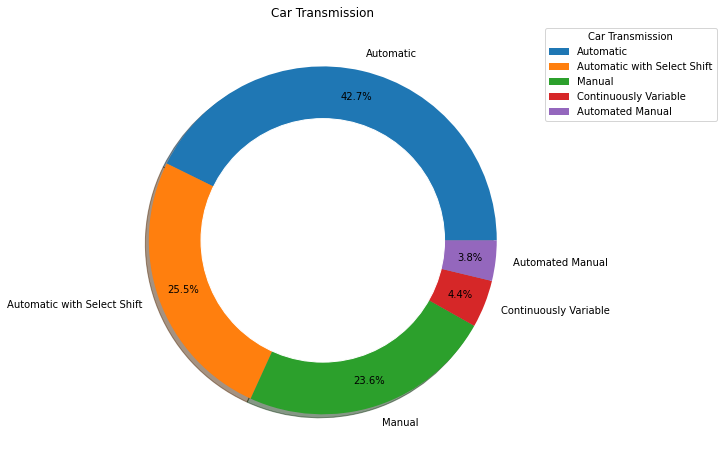

In [ ]:
sizes = dict(data['TRANSMISSION'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Car Transmission")
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True)
plt.legend(title="Car Transmission", labels=sizes.keys(), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

In [ ]:
Transmission = data["TRANSMISSION"].value_counts().rename_axis("TRANSMISSION").reset_index(name='counts')

fig = px.bar(Transmission, x="TRANSMISSION", y="counts", color="counts", title="Car Transmission")
fig.show()

#### 5. Fuel Type

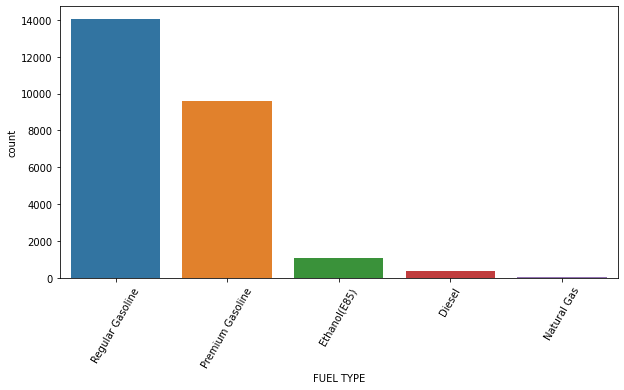

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="FUEL TYPE",data=data,order=data["FUEL TYPE"].value_counts().index) 
plt.xticks(rotation=60)
plt.show()

In [ ]:
FUEL_TYPE = data["FUEL TYPE"].value_counts().rename_axis("FUEL TYPE").reset_index(name='counts')

fig = px.bar(FUEL_TYPE, x="FUEL TYPE", y="counts", color="counts", title="FUEL TYPE")
fig.show()

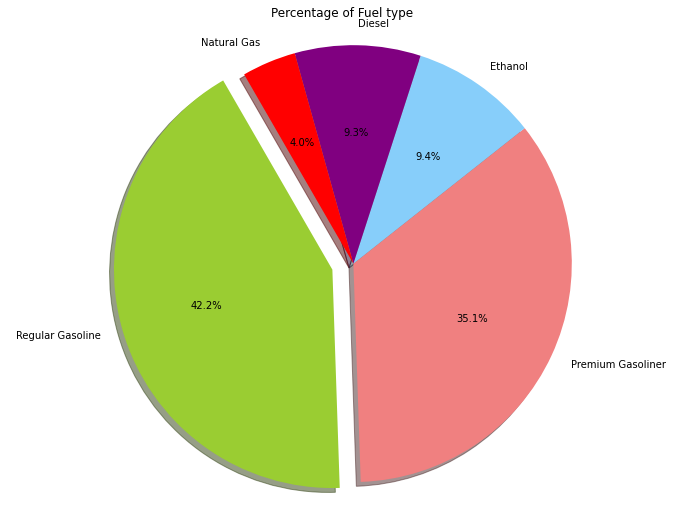

In [ ]:
plt.figure(figsize=(12,9))
labels = 'Regular Gasoline', 'Premium Gasoliner', 'Ethanol', 'Diesel','Natural Gas'
sizes = [42203, 35112, 9374, 9307,4004]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue','purple','red']
explode = (0.1,0, 0, 0,0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)
plt.rcParams['figure.figsize']=(19,40)
plt.axis('equal')
plt.title('Percentage of Fuel type')
plt.show()

### Relationship of the Categorical Features with CO2 Emissions

####  1. Make

In [ ]:
fig= px.histogram (data, x= "MAKE",y = "CO2 EMISSIONS ")
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'},
                 title='CO2 Emissions r/ship with car make')
fig.show()

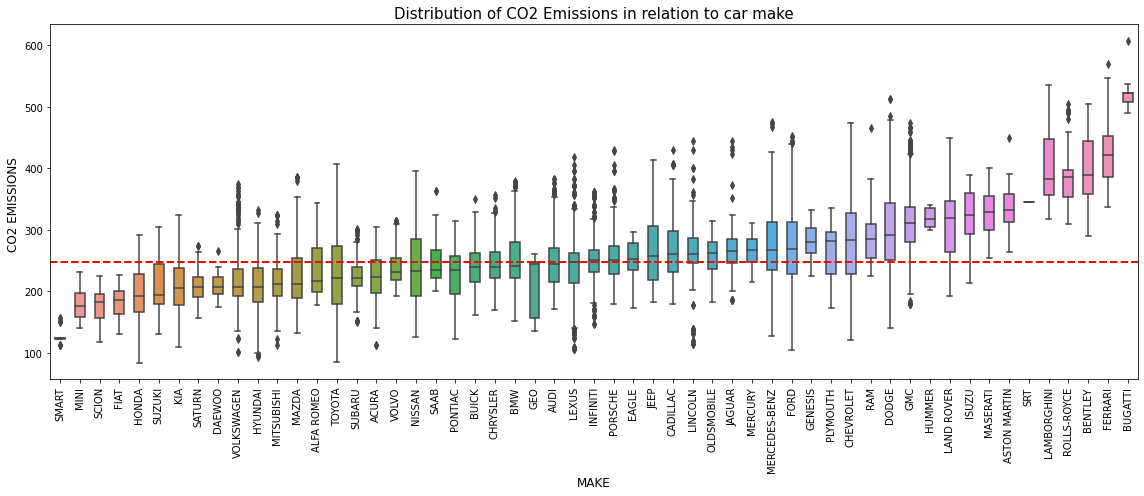

In [ ]:
plt.figure(figsize=(16,7))
order = data.groupby("MAKE")["CO2 EMISSIONS "].median().sort_values(ascending=True).index
sns.boxplot(x="MAKE", y="CO2 EMISSIONS ", data=data, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to car make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("MAKE", fontsize=12)
plt.ylabel("CO2 EMISSIONS ", fontsize=12)
plt.axhline(data["CO2 EMISSIONS "].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

#### 1. From both the bar graph and the box plot it can be inferred that average CO2 emissions of cars belonging to brands Bugatti, Ferrari, Bentley have the highest with Bugatti leading  and cars of Smart,mini,scion have the lowest emissions.¶
#### 2. The red line signify the sample mean of CO2 emissions.
#### 3. Almost 50% of the brand has their median CO2 emissions less than the sample median of CO2 emissions by all the cars

#### 2. Vehicle Class

Text(0, 0.5, 'CO2 EMISSIONS ')

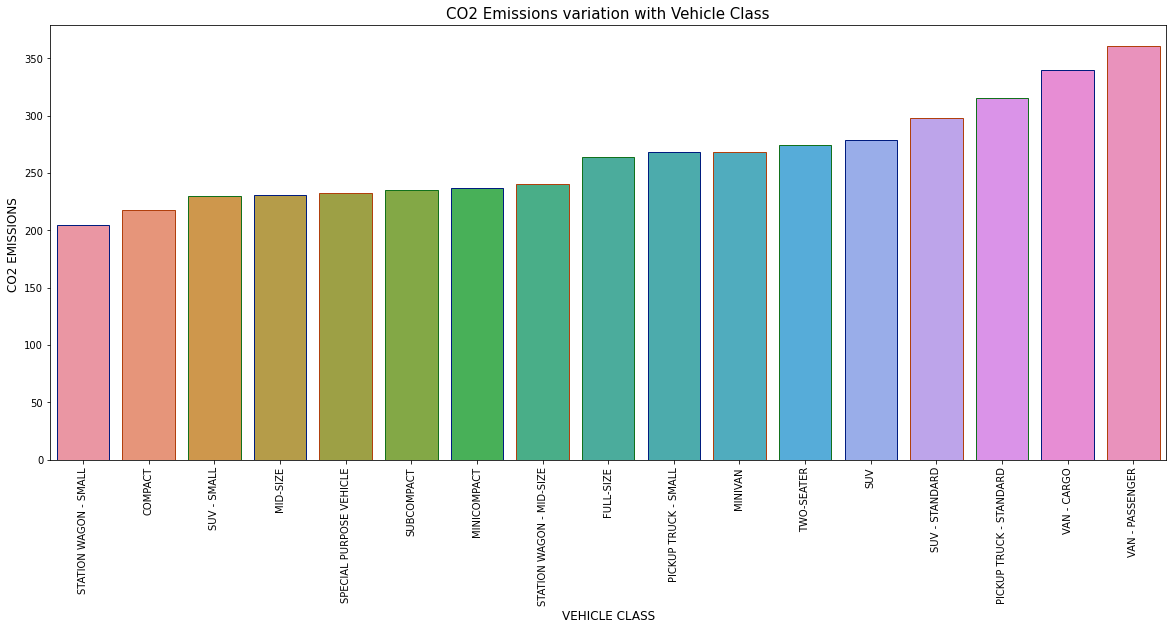

In [ ]:
CO2_class = data.groupby(['VEHICLE CLASS'])["CO2 EMISSIONS "].mean().sort_values().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "VEHICLE CLASS",y="CO2 EMISSIONS ",data = CO2_class,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Vehicle Class', fontsize=15)
plt.xlabel("VEHICLE CLASS", fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel("CO2 EMISSIONS ", fontsize=12)

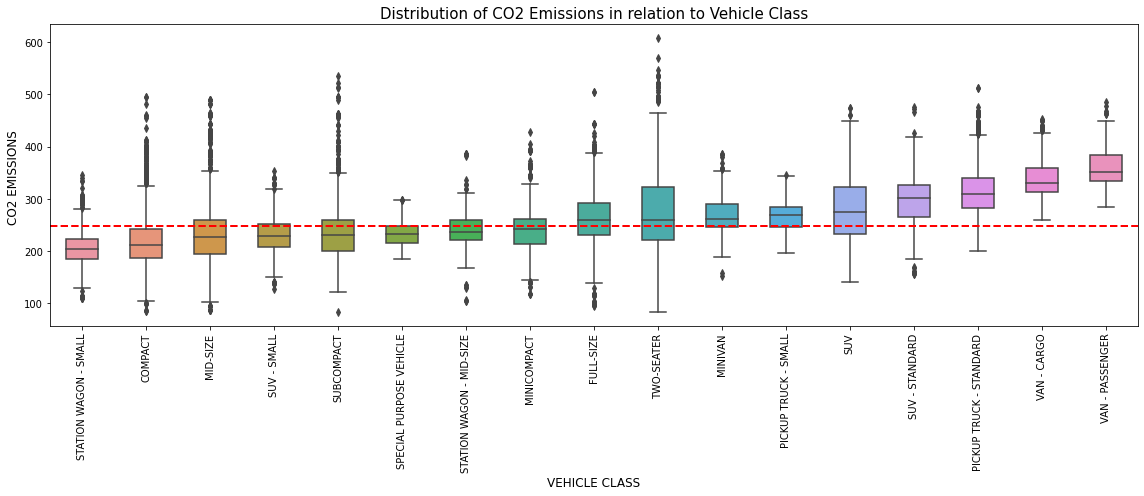

In [ ]:
plt.figure(figsize=(16,7))
order = data.groupby('VEHICLE CLASS')["CO2 EMISSIONS "].median().sort_values(ascending=True).index
sns.boxplot(x='VEHICLE CLASS', y="CO2 EMISSIONS ", data=data, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Vehicle Class", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel('VEHICLE CLASS', fontsize=12)
plt.ylabel("CO2 EMISSIONS ", fontsize=12)
plt.axhline(data["CO2 EMISSIONS "].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

#### 3. Transmission

Text(0, 0.5, 'CO2 Emissions')

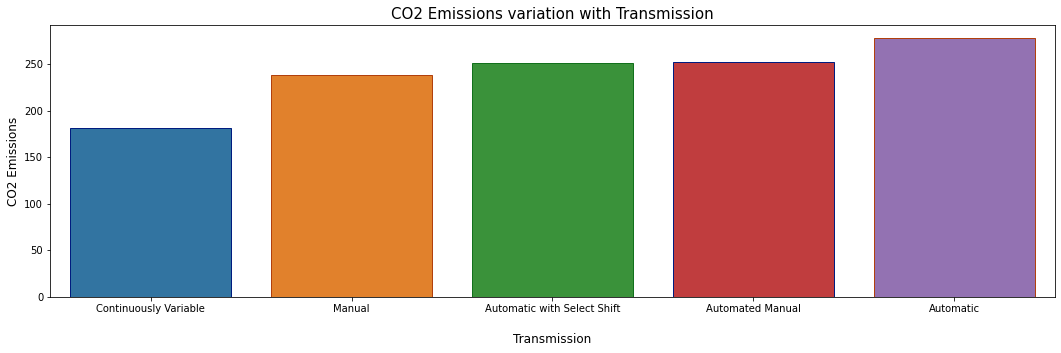

In [ ]:
CO2_transmission = data.groupby(["TRANSMISSION"])["CO2 EMISSIONS "].mean().sort_values().reset_index()

plt.figure(figsize=(18,5))
sns.barplot(x = "TRANSMISSION",y="CO2 EMISSIONS ", data = CO2_transmission,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Transmission', fontsize=15)
plt.xlabel('\nTransmission', fontsize=12)
plt.xticks(horizontalalignment='center')
plt.ylabel('CO2 Emissions', fontsize=12)

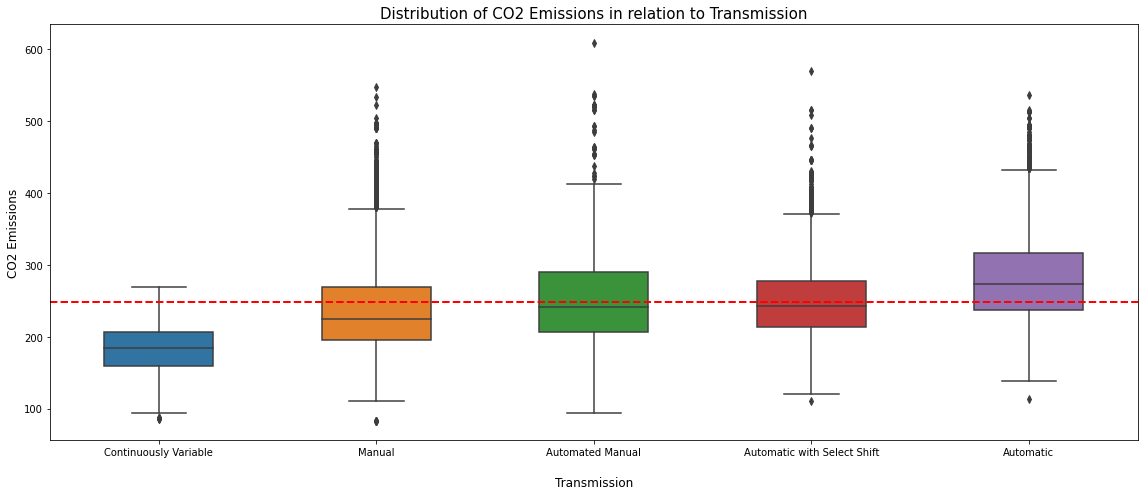

In [ ]:
plt.figure(figsize=(16,7))
order = data.groupby("TRANSMISSION")["CO2 EMISSIONS "].median().sort_values(ascending=True).index
sns.boxplot(x="TRANSMISSION", y="CO2 EMISSIONS ", data=data, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Transmission", fontsize=15)
plt.xlabel("\nTransmission", fontsize=12)
plt.ylabel("CO2 Emissions", fontsize=12)
plt.axhline(data["CO2 EMISSIONS "].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

#### 4.  Fuel type

Text(0, 0.5, 'CO2 EMISSIONS ')

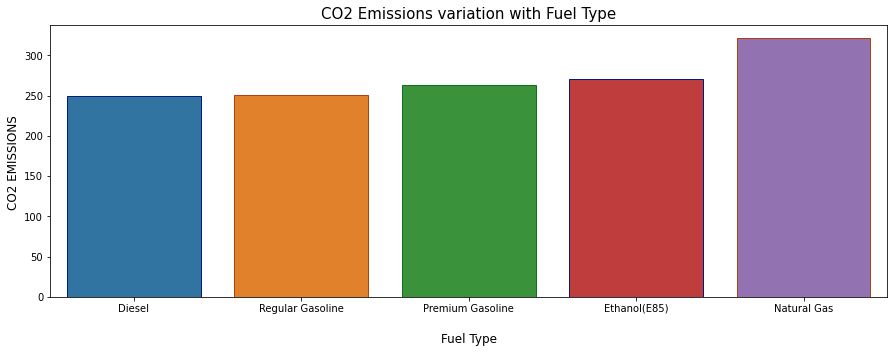

In [ ]:
CO2_fuel_type = data.groupby(['FUEL TYPE'])["CO2 EMISSIONS "].mean().sort_values().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = 'FUEL TYPE',y="CO2 EMISSIONS ",data = CO2_fuel_type,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Fuel Type', fontsize=15)
plt.xlabel('\nFuel Type', fontsize=12)
plt.ylabel("CO2 EMISSIONS ", fontsize=12)

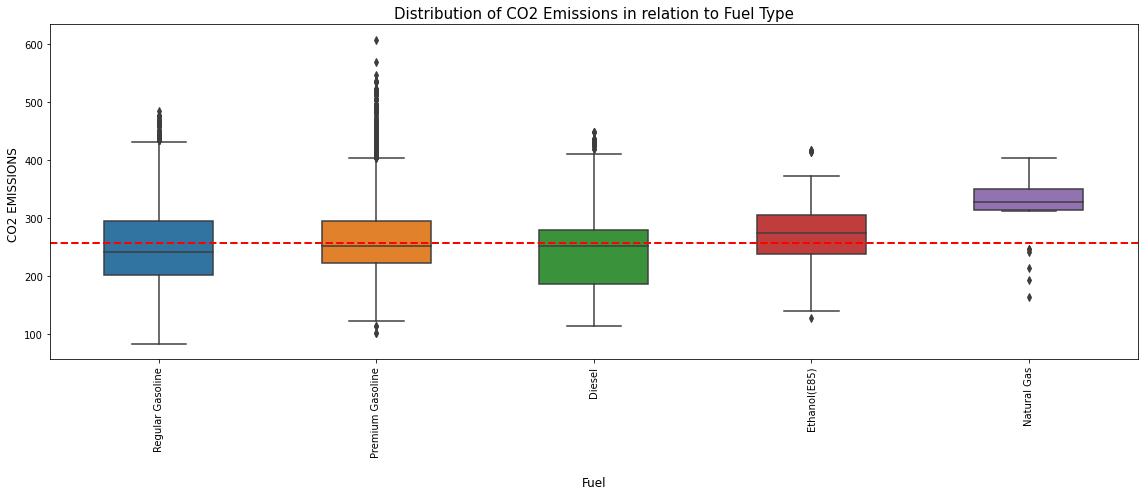

In [ ]:
plt.figure(figsize=(16,7))
order = data.groupby("FUEL TYPE")["CO2 EMISSIONS "].median().sort_values(ascending=True).index
sns.boxplot(x="FUEL TYPE", y="CO2 EMISSIONS ", data=data, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Fuel Type", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("\nFuel", fontsize=12)
plt.ylabel("CO2 EMISSIONS ", fontsize=12)
plt.axhline(data["CO2 EMISSIONS "].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

### Visualizing the Numerical Data

In [ ]:
pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from numpy import percentile
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
from tabulate import tabulate

#### descriptive analysis

In [ ]:
stats_ = data.describe().T.drop(["count"], axis=1)
stats_ = pd.concat([stats_, data.skew()], axis=1)
stats_.columns = ["mean", "std", "min", "25%", "median", "75%", "max", "skew"]
cols = ["mean", "25%", "median", "75%", "std", "skew", "min", "max"]
stats_ = stats_[cols]
print(tabulate(stats_, headers="keys", floatfmt=".2f"))

                                     mean      25%    median      75%    std    skew      min      max
--------------------------------  -------  -------  --------  -------  -----  ------  -------  -------
MODEL YEAR                        2009.10  2003.00   2010.00  2015.00   7.47   -0.21  1995.00  2021.00
ENGINE SIZE(L)                       3.36     2.30      3.00     4.30   1.34    0.62     0.80     8.40
CYLINDERS                            5.85     4.00      6.00     8.00   1.79    0.88     2.00    16.00
FUEL CONSUMPTION CITY (L/100 km)    13.05    10.60     12.60    15.10   3.56    0.69     3.50    30.60
FUEL CONSUMPTION HWY (L/100 km)      9.15     7.40      8.70    10.50   2.40    0.89     3.20    20.90
FUEL CONSUMPTION COMB (L/100 km)    11.30     9.20     10.80    13.00   3.00    0.75     3.60    26.10
FUEL CONSUMPTION COMB (mpg)         26.77    22.00     26.00    31.00   7.29    1.16    11.00    78.00
CO2 EMISSIONS                      256.53   212.00    248.00   297.00  62

#### checking the distribution and skewdness

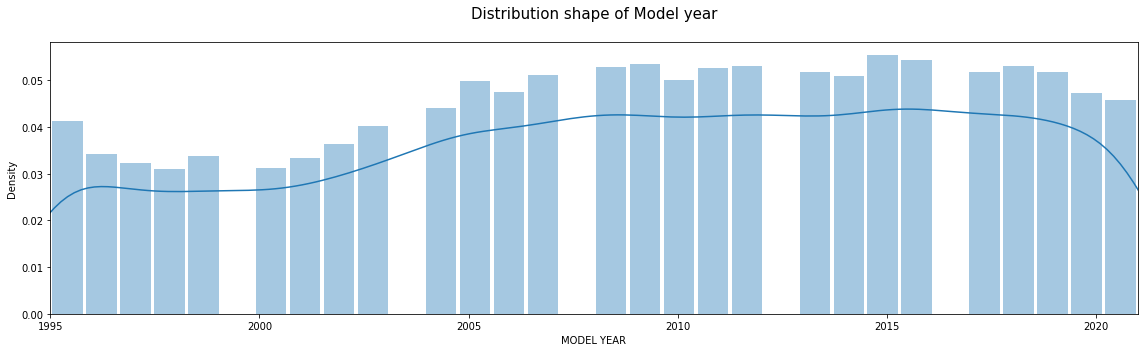

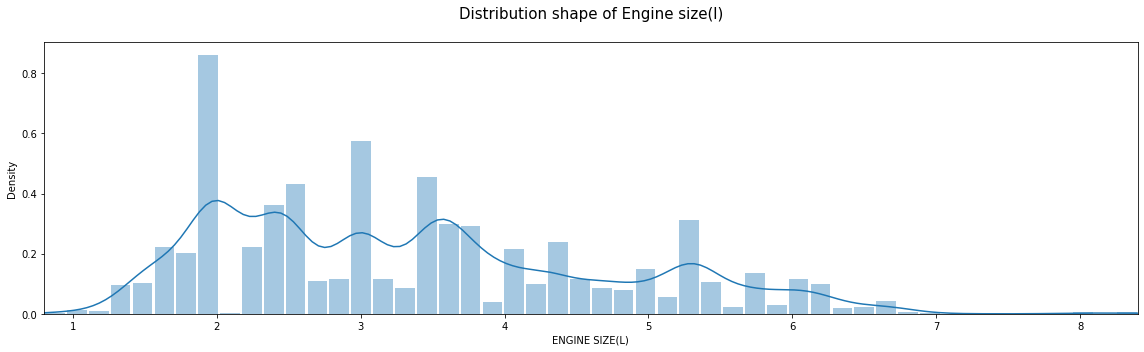

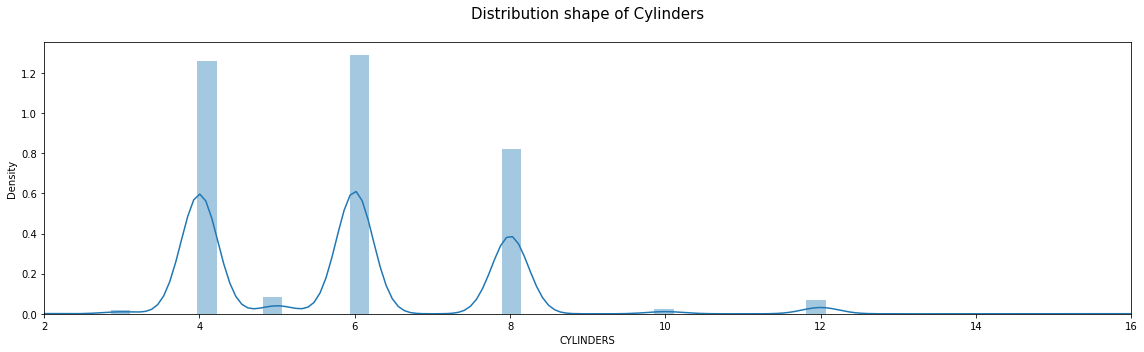

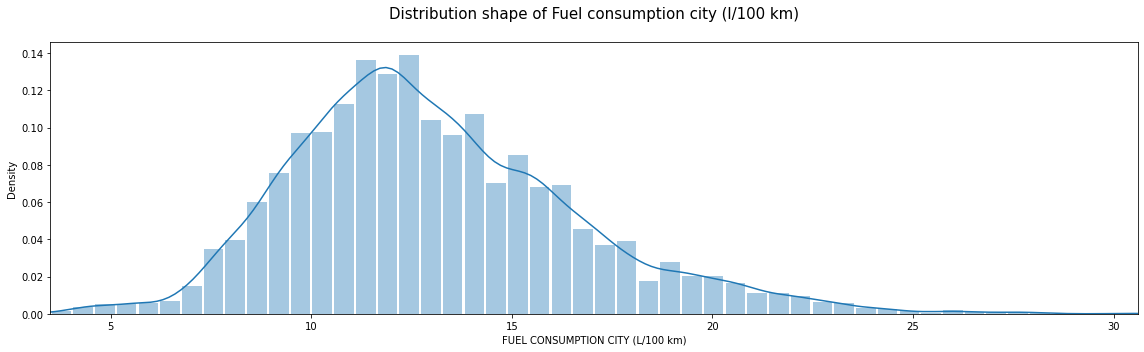

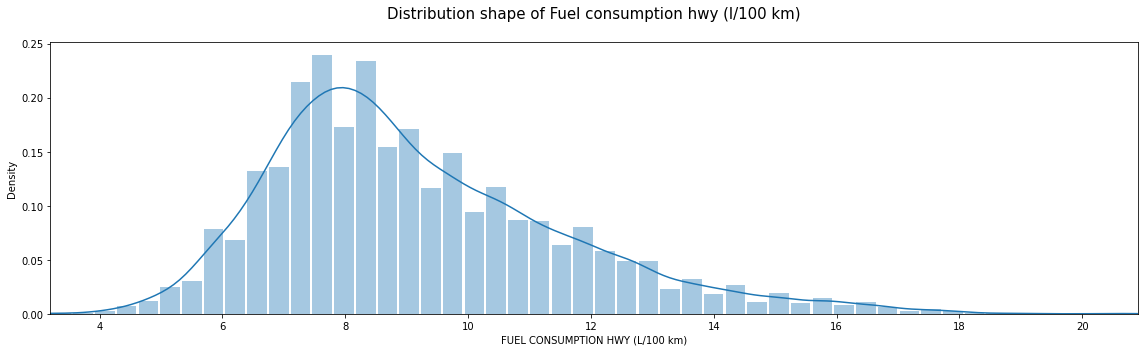

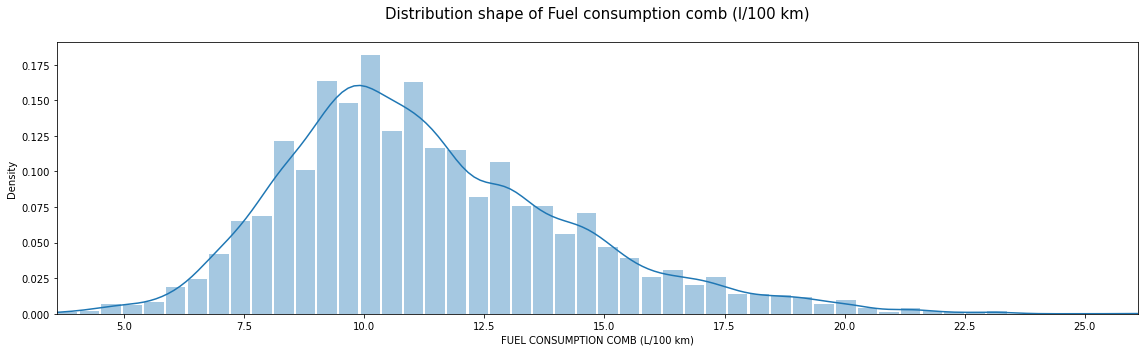

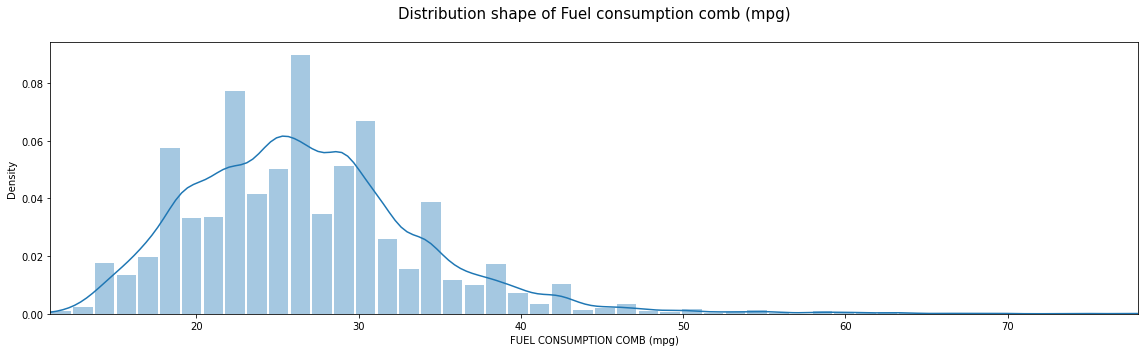

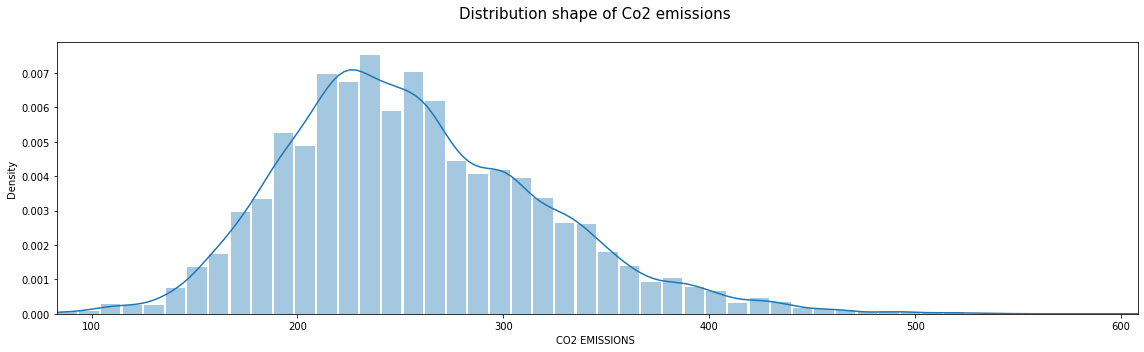

In [ ]:
for feature in data.select_dtypes("number").columns:
    
    plt.figure(figsize=(16,5))
    sns.distplot(data[feature], hist_kws={"rwidth": 0.9})
    plt.xlim(data[feature].min(), data[feature].max())
    plt.title(f"Distribution shape of {feature.capitalize()}\n", fontsize=15)
    plt.tight_layout()
    plt.show()

##### Visualizing the distribution of the dependent varibale using a Frequency Distribution plot and a Box plot

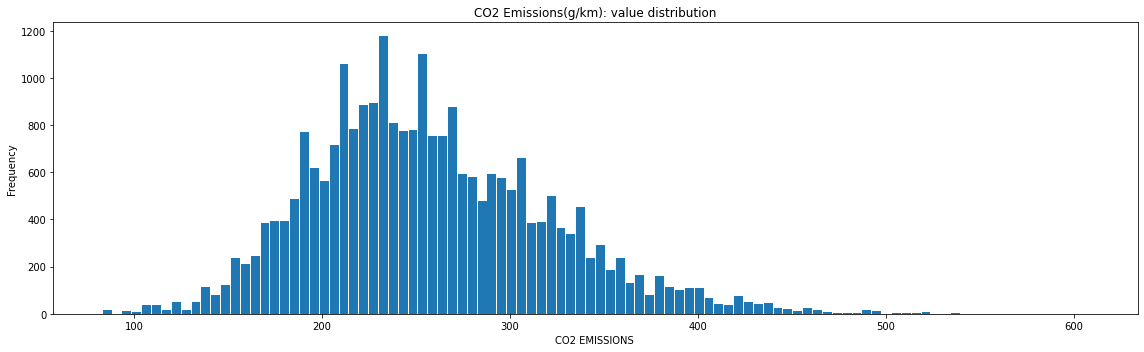

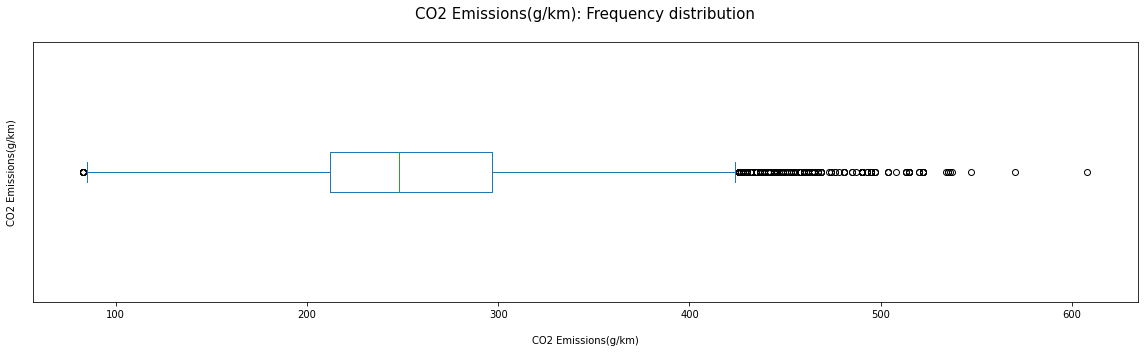

In [ ]:
plt.figure(figsize=(16,5))
data["CO2 EMISSIONS "].plot(kind="hist", bins=100, rwidth=0.9)
plt.title("CO2 Emissions(g/km): value distribution")
plt.xlabel("CO2 EMISSIONS ")
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,5))
data["CO2 EMISSIONS "].plot(kind="box", vert=False)
plt.title("CO2 Emissions(g/km): Frequency distribution\n", fontsize=15)
plt.xlabel("\nCO2 Emissions(g/km)")
plt.yticks([0], [''])
plt.ylabel("CO2 Emissions(g/km)\n", rotation=90)
plt.tight_layout()
plt.show()

### Variation in CO2 emissions with different features


#### Feature:Year

Text(0, 0.5, 'CO2 Emissions')

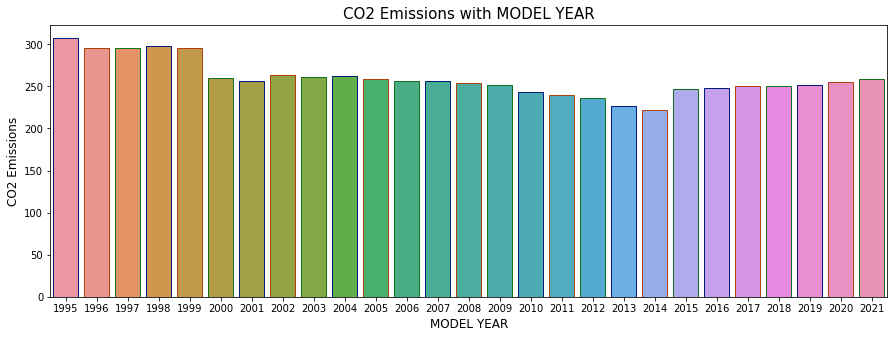

In [ ]:
CO2_cylinder = data.groupby(['MODEL YEAR'])["CO2 EMISSIONS "].mean().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = 'MODEL YEAR',y="CO2 EMISSIONS ",data = CO2_cylinder,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with MODEL YEAR', fontsize=15)
plt.xlabel('MODEL YEAR', fontsize=12)
plt.ylabel('CO2 Emissions', fontsize=12)

Text(0, 0.5, 'CO2 Emissions(g/km)')

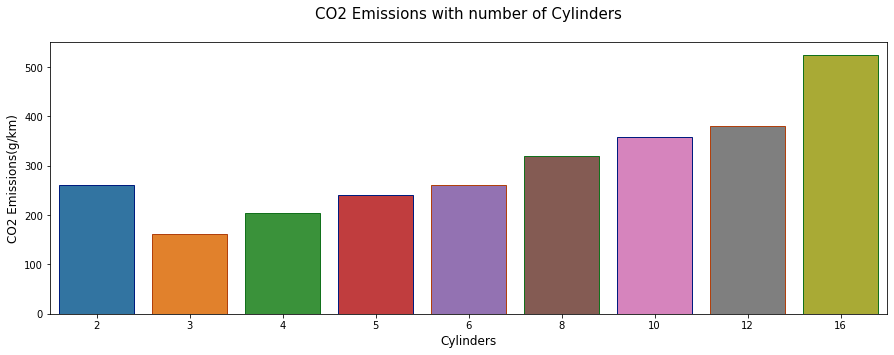

In [ ]:
CO2_cylinder = data.groupby(['CYLINDERS'])["CO2 EMISSIONS "].mean().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = 'CYLINDERS',y="CO2 EMISSIONS ",data = CO2_cylinder,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with number of Cylinders\n', fontsize=15)
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

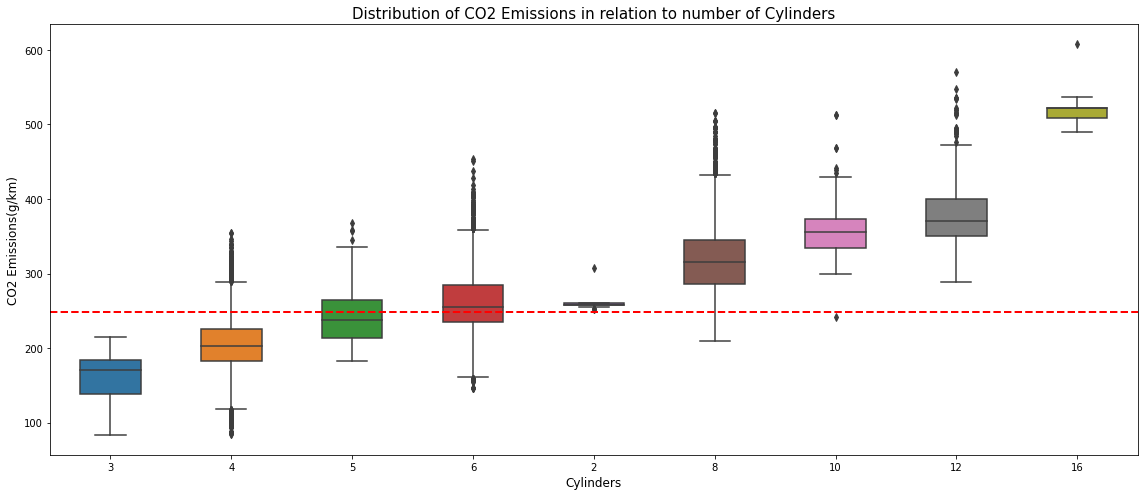

In [ ]:
plt.figure(figsize=(16,7))
order = data.groupby('CYLINDERS')["CO2 EMISSIONS "].median().sort_values(ascending=True).index
sns.boxplot(x='CYLINDERS', y="CO2 EMISSIONS ", data=data, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to number of Cylinders", fontsize=15)
plt.xlabel("Cylinders", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(data["CO2 EMISSIONS "].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'CO2 Emissions')

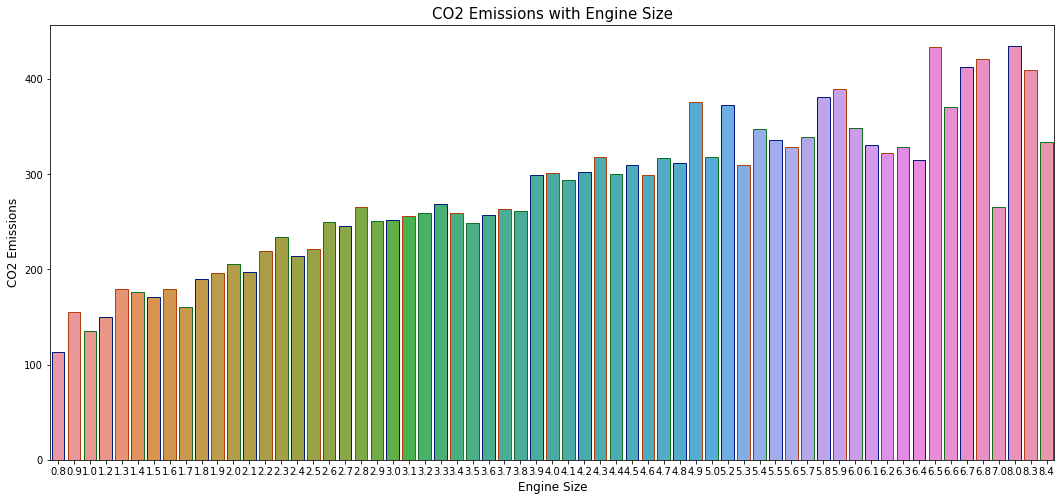

In [ ]:
CO2_engine = data.groupby(['ENGINE SIZE(L)'])["CO2 EMISSIONS "].mean().reset_index()

plt.figure(figsize=(18,8))
sns.barplot(x = "ENGINE SIZE(L)",y="CO2 EMISSIONS ",data = CO2_engine,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Engine Size', fontsize=15)
plt.xlabel('Engine Size', fontsize=12)
plt.ylabel('CO2 Emissions', fontsize=12)

Text(0, 0.5, 'Fuel Consumption Comb (L/100 km)')

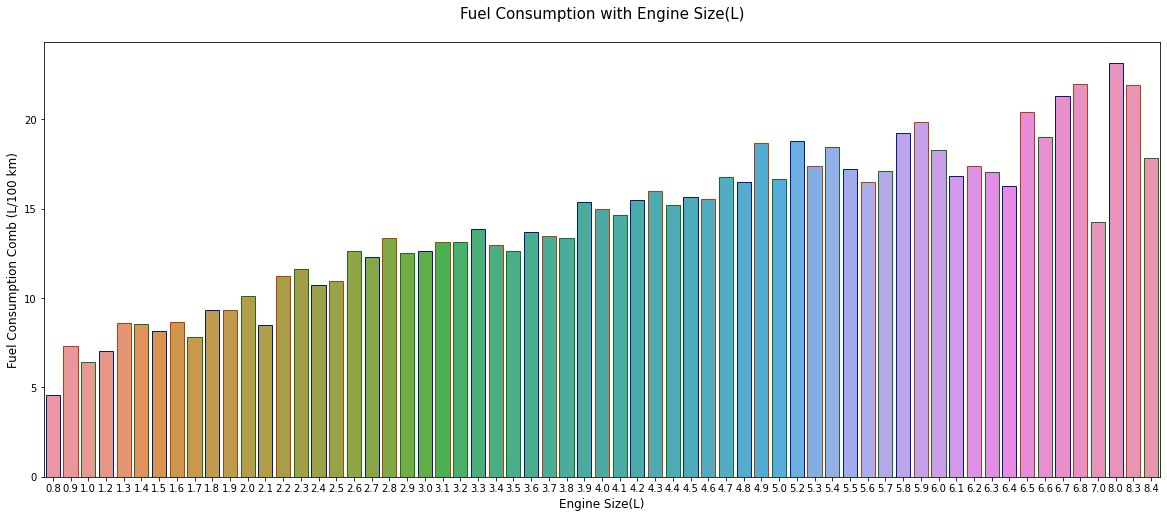

In [ ]:
fuel_engine = data.groupby(['ENGINE SIZE(L)'])["FUEL CONSUMPTION CITY (L/100 km)"].mean().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "ENGINE SIZE(L)",y="FUEL CONSUMPTION CITY (L/100 km)",data = fuel_engine,
            edgecolor=sns.color_palette("dark", 3))
plt.title('Fuel Consumption with Engine Size(L)\n', fontsize=15)
plt.xlabel('Engine Size(L)', fontsize=12)
plt.ylabel('Fuel Consumption Comb (L/100 km)', fontsize=12)

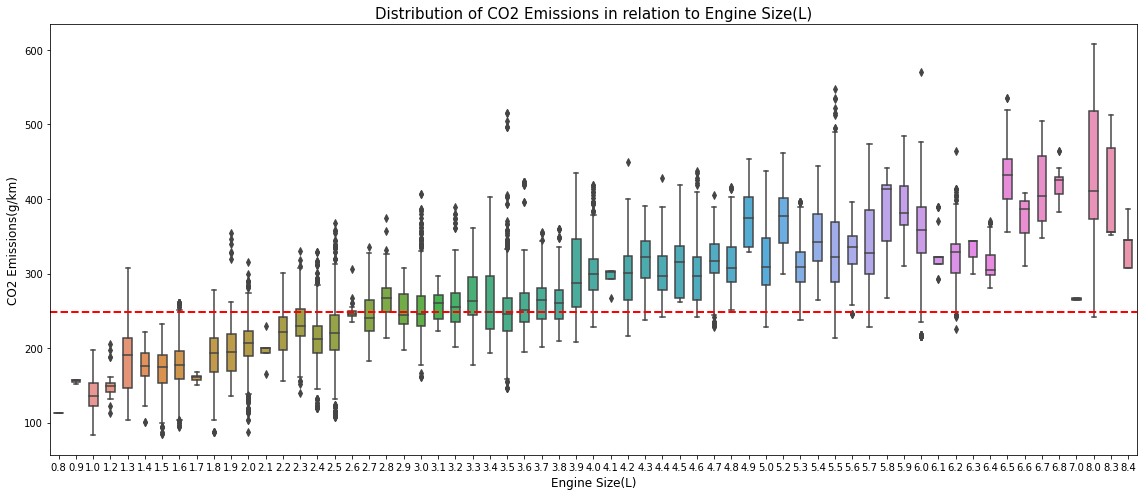

In [ ]:
plt.figure(figsize=(16,7))
order = data.groupby("ENGINE SIZE(L)")["CO2 EMISSIONS "].median().index
sns.boxplot(x="ENGINE SIZE(L)", y="CO2 EMISSIONS ", data=data, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Engine Size(L)", fontsize = 15)
plt.xlabel("Engine Size(L)", fontsize = 12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(data["CO2 EMISSIONS "].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'CO2 Emissions')

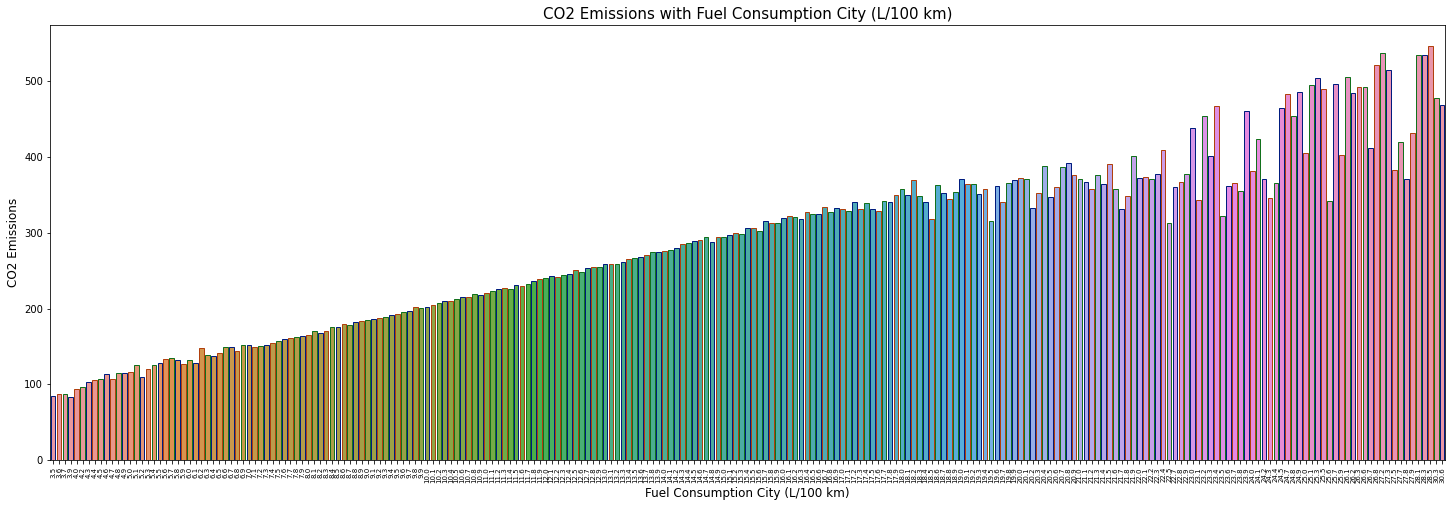

In [ ]:
CO2_city = data.groupby(['FUEL CONSUMPTION CITY (L/100 km)'])["CO2 EMISSIONS "].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "FUEL CONSUMPTION CITY (L/100 km)", y="CO2 EMISSIONS ",data = CO2_city,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption City (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption City (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions', fontsize=12)

Text(0, 0.5, 'CO2 Emissions')

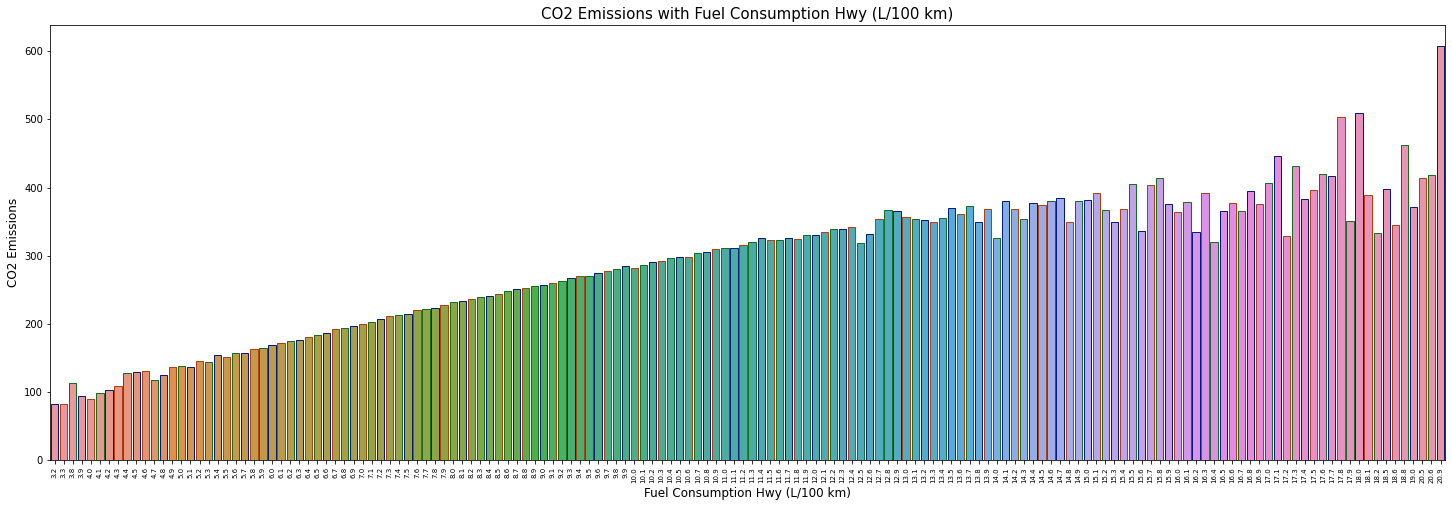

In [ ]:
CO2_hwy = data.groupby(['FUEL CONSUMPTION HWY (L/100 km)'])["CO2 EMISSIONS "].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "FUEL CONSUMPTION HWY (L/100 km)", y="CO2 EMISSIONS ",data = CO2_hwy,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Hwy (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption Hwy (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions', fontsize=12)

Text(0, 0.5, 'CO2 Emissions')

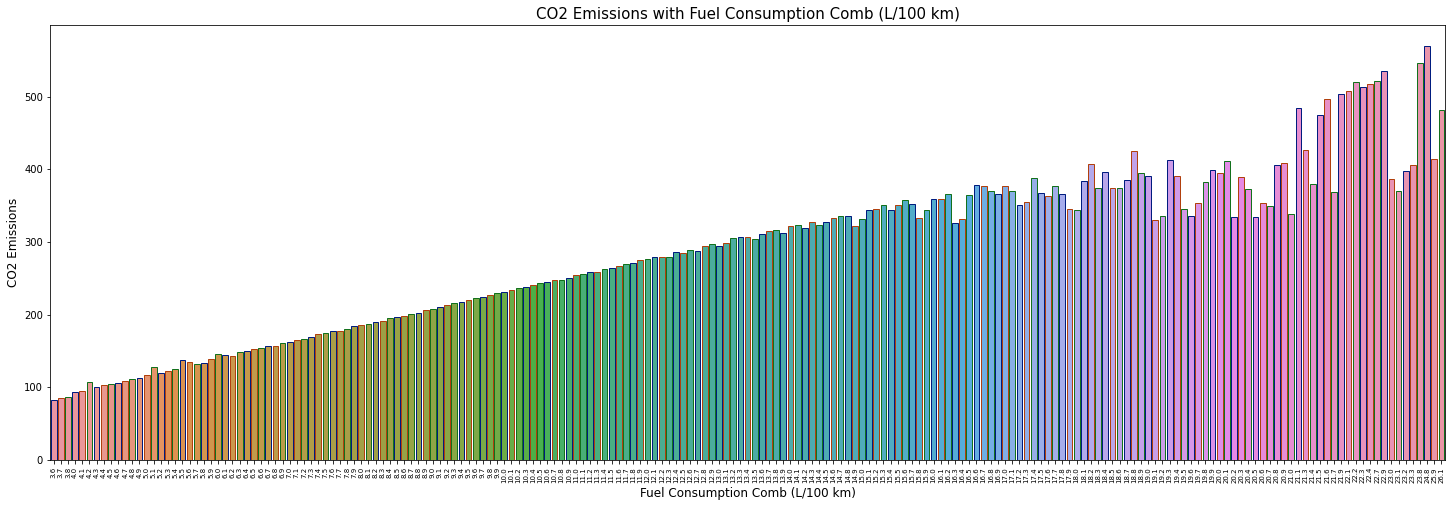

In [ ]:
CO2_comb = data.groupby(['FUEL CONSUMPTION COMB (L/100 km)'])["CO2 EMISSIONS "].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = 'FUEL CONSUMPTION COMB (L/100 km)', y="CO2 EMISSIONS ",data = CO2_comb,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Comb (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption Comb (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions', fontsize=12)

Text(0, 0.5, 'CO2 Emissions')

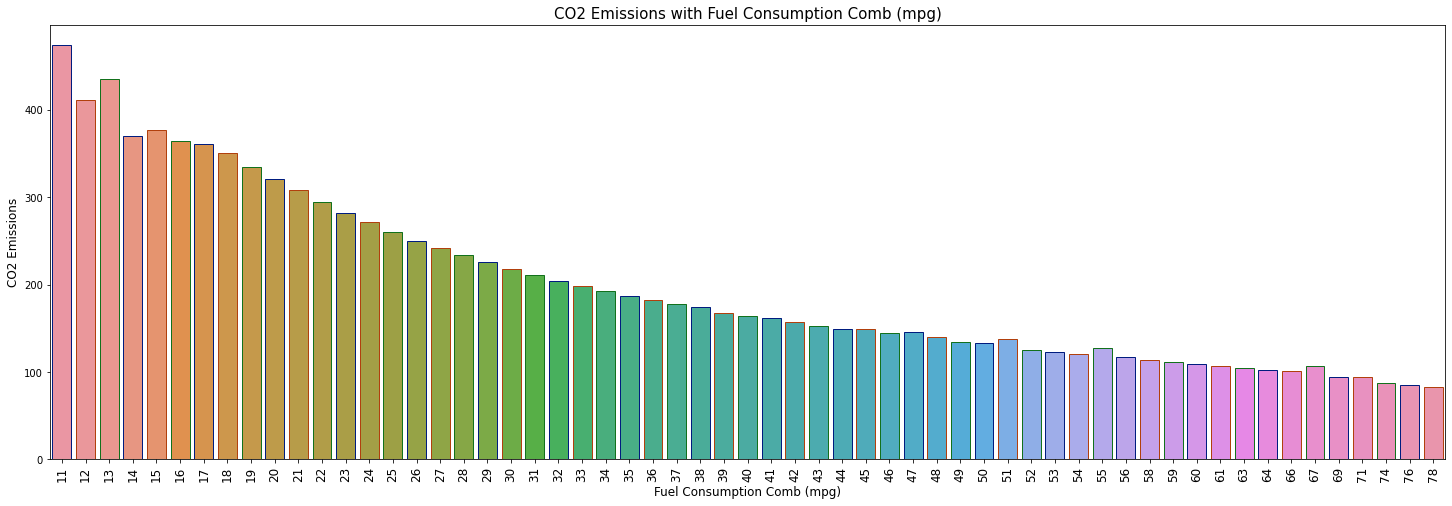

In [ ]:
CO2_comb_mpg = data.groupby(['FUEL CONSUMPTION COMB (mpg)'])["CO2 EMISSIONS "].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "FUEL CONSUMPTION COMB (mpg)", y="CO2 EMISSIONS ",data = CO2_comb_mpg,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Comb (mpg)', fontsize=15)
plt.xlabel('Fuel Consumption Comb (mpg)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='12')
plt.ylabel('CO2 Emissions', fontsize=12)

## MODELLING

### Data preprocessing

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Carbon Emission Rating/Carbon Emission.csv")

## FEATURE ENGINEERING

* MODEL_YEAR: Concatenating the vehicle model and year to get a more specific description
* MODEL FREQ: Frequency encdoing utilizes the frequency of occurence of the vehicle model
* FUEL_CONS_HWY_CITY: Summing up fuel consumption of both city and highway
* ENG_POWER: Product of Number of Cylinders and the engine size could help to determine engine power and fuel consumption

In [ ]:
data["MODEL_YEAR"] = data["MODEL"] + " " + str(data["MODEL YEAR"])

to_freq_encode = ["MODEL", "MODEL_YEAR"]
for i in to_freq_encode:
    data[i+' FREQ'] = data[i].map(data[i].value_counts())
    
data["FUEL_CONS_HWY_CITY"] = data['FUEL CONSUMPTION HWY (L/100 km)'] + data['FUEL CONSUMPTION CITY (L/100 km)']
data["ENG_POWER"] = data["ENGINE SIZE(L)"] * data["CYLINDERS"]

In [ ]:
data.head()

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE(L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS,MODEL_YEAR,MODEL FREQ,MODEL_YEAR FREQ,FUEL_CONS_HWY_CITY,ENG_POWER
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.6,8.3,10.1,28,232,INTEGRA 0 1995\n1 1995\n2 ...,14,14,19.9,7.2
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,11.0,8.3,9.8,29,225,INTEGRA 0 1995\n1 1995\n2 ...,14,14,19.3,7.2
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4,M5,Z,10.8,8.3,9.7,29,223,INTEGRA GS-R 0 1995\n1 1995\n2 ...,5,5,19.1,7.2
3,1995,ACURA,LEGEND,COMPACT,3.2,6,A4,Z,14.2,10.5,12.5,23,288,LEGEND 0 1995\n1 1995\n2 ...,1,1,24.7,19.2
4,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6,A4,Z,14.6,11.0,13.0,22,299,LEGEND COUPE 0 1995\n1 1995\n2 ...,2,2,25.6,19.2


In [ ]:
data["MODEL YEAR"] = data["MODEL YEAR"].apply(str)
target = 'CO2 EMISSIONS '
cat_features = list(data.select_dtypes(include=['object']).columns)
numeric_features = [col for col in data.columns if col not in cat_features]
numeric_features.remove(target)

In [ ]:
print(numeric_features)
print(cat_features)

['ENGINE SIZE(L)', 'CYLINDERS', 'FUEL CONSUMPTION CITY (L/100 km)', 'FUEL CONSUMPTION HWY (L/100 km)', 'FUEL CONSUMPTION COMB (L/100 km)', 'FUEL CONSUMPTION COMB (mpg)', 'MODEL FREQ', 'MODEL_YEAR FREQ', 'FUEL_CONS_HWY_CITY', 'ENG_POWER']
['MODEL YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL TYPE', 'MODEL_YEAR']


In [ ]:
for col in cat_features:
    print(f"{col} : {data[col].nunique()} Unique values")

MODEL YEAR : 27 Unique values
MAKE : 90 Unique values
MODEL : 4548 Unique values
VEHICLE CLASS : 32 Unique values
TRANSMISSION : 30 Unique values
FUEL TYPE : 5 Unique values
MODEL_YEAR : 4548 Unique values


In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [ ]:
LE = LabelEncoder() 
MinMax = MinMaxScaler()

### Label Encode Categorical Features

In [ ]:
for col in cat_features:
    data[col] = LE.fit_transform(data[col])

In [ ]:
X = data[numeric_features + cat_features]
y = data[target]

### Normalize training features using MinMaxScaler

In [ ]:
X_scaled = MinMax.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
def MBE(ground_truth, prediction):
    return np.sum(ground_truth - prediction) / len(ground_truth)

def MABE(ground_truth, prediction):
    return np.sum(abs(ground_truth - prediction)) / len(ground_truth)

def rRMSE(ground_truth, prediction):
    return np.sqrt(mean_squared_error(ground_truth, prediction))/np.mean(ground_truth) * 100

def evaluate_model(ground_truth, prediction, model):
    metrics = {
        "R_Squared": r2_score(ground_truth, prediction),
        "RMSE": np.sqrt(mean_squared_error(ground_truth, prediction)),
        "MAPE": mean_absolute_percentage_error(ground_truth, prediction),
        "MBE": MBE(ground_truth, prediction),
        "rRMSE":  rRMSE(ground_truth, prediction),
        "MABE": MABE(ground_truth, prediction)
    }
    return pd.DataFrame(pd.Series(metrics), columns=[model])

combined_metrics = []

In [ ]:
input_layer = X.shape[1]
hidden_layer = 100

### Artifitial Neural Network (ANN)

In [ ]:
ANN = MLPRegressor(activation="relu", 
                   hidden_layer_sizes = (hidden_layer, ), 
                   learning_rate_init= 0.001, 
                   momentum= 0.9, 
                   max_iter= 300  #number of Epochs
                  )

In [ ]:
ANN.fit(X_train_scaled, y_train)

MLPRegressor(max_iter=300)

In [ ]:
ann_prediction = ANN.predict(X_test_scaled)

In [ ]:
ann_metrics = evaluate_model(y_test,  ann_prediction, "ANN")
combined_metrics.append(ann_metrics)
ann_metrics

,ANN
R_Squared,0.985331
RMSE,7.647914
MAPE,0.011595
MBE,0.730811
rRMSE,2.968344
MABE,3.061708


### Support Vector Machine

In [ ]:
svm = SVR( kernel='rbf',
            degree=3,
            C=1.0,
            epsilon=0.1,)
svm.fit(X_train_scaled, y_train)

SVR()

In [ ]:
svm_prediction = svm.predict(X_test_scaled)

In [ ]:
svm_metrics = evaluate_model(y_test,  svm_prediction, "SVM")
combined_metrics.append(svm_metrics)
svm_metrics

,SVM
R_Squared,0.953228
RMSE,13.656148
MAPE,0.020948
MBE,1.036619
rRMSE,5.300287
MABE,5.658215


In [ ]:
 # defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = RandomizedSearchCV(SVR(),param_grid, cv=3,scoring="neg_mean_squared_error",refit = True, verbose = 3, n_iter = 5)
 
# fitting the model for grid search
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END ....C=0.1, gamma=1, kernel=rbf;, score=-1009.058 total time=  17.7s
[CV 2/3] END .....C=0.1, gamma=1, kernel=rbf;, score=-969.545 total time=  18.3s
[CV 3/3] END .....C=0.1, gamma=1, kernel=rbf;, score=-968.525 total time=  20.8s
[CV 1/3] END C=0.1, gamma=0.001, kernel=rbf;, score=-4022.537 total time=  18.0s
[CV 2/3] END C=0.1, gamma=0.001, kernel=rbf;, score=-4011.849 total time=  18.6s
[CV 3/3] END C=0.1, gamma=0.001, kernel=rbf;, score=-3919.913 total time=  20.6s
[CV 1/3] END C=10, gamma=0.0001, kernel=rbf;, score=-3690.466 total time=  18.1s
[CV 2/3] END C=10, gamma=0.0001, kernel=rbf;, score=-3676.930 total time=  20.2s
[CV 3/3] END C=10, gamma=0.0001, kernel=rbf;, score=-3588.387 total time=  20.6s
[CV 1/3] END .C=1, gamma=0.0001, kernel=rbf;, score=-4022.473 total time=  18.1s
[CV 2/3] END .C=1, gamma=0.0001, kernel=rbf;, score=-4011.786 total time=  18.0s
[CV 3/3] END .C=1, gamma=0.0001, kernel=rbf;, sco

RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=5,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'kernel': 'rbf', 'gamma': 1, 'C': 0.1}
SVR(C=0.1, gamma=1)


In [ ]:
svm_tuned_prediction = grid.predict(X_test_scaled)
svm_tuned_metrics = evaluate_model(y_test,  svm_tuned_prediction, "SVM_tuned")
combined_metrics.append(svm_tuned_metrics)
svm_tuned_metrics

,SVM_tuned
R_Squared,0.807778
RMSE,27.684508
MAPE,0.066542
MBE,3.638219
rRMSE,10.745039
MABE,17.153231


### Deep Neural Network (DNN)

In [ ]:
DNN = MLPRegressor(activation="relu", 
                   hidden_layer_sizes = (100, 100), 
                   learning_rate_init= 0.001, 
                   momentum= 0.9, 
                   max_iter= 300  #number of Epochs
                  )

In [ ]:
DNN.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=300)

In [ ]:
dnn_prediction = DNN.predict(X_test_scaled)

In [ ]:
dnn_metrics = evaluate_model(y_test,  dnn_prediction, "DNN")
combined_metrics.append(dnn_metrics)
dnn_metrics

,DNN
R_Squared,0.997352
RMSE,3.249353
MAPE,0.006192
MBE,-0.921004
rRMSE,1.261154
MABE,1.553226


### Decision Tree Regressor

In [ ]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
DT_prediction = decision_tree.predict(X_test)
dt_metrics = evaluate_model(y_test, DT_prediction, "Decision Tree")
combined_metrics.append(dt_metrics)
dt_metrics

,Decision Tree
R_Squared,0.999697
RMSE,1.099744
MAPE,0.001040
MBE,-0.010551
rRMSE,0.426838
MABE,0.259009


In [ ]:
param_grid = {'max_depth':[2,3,4,5,6,7,8],}
 
grid = RandomizedSearchCV(DecisionTreeRegressor(),param_grid, cv=3,scoring="neg_mean_squared_error",refit = True, verbose = 3, n_iter = 5)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END .....................max_depth=6;, score=-31.449 total time=   0.1s
[CV 2/3] END .....................max_depth=6;, score=-39.170 total time=   0.1s
[CV 3/3] END .....................max_depth=6;, score=-31.853 total time=   0.1s
[CV 1/3] END ......................max_depth=8;, score=-7.141 total time=   0.1s
[CV 2/3] END .....................max_depth=8;, score=-12.468 total time=   0.1s
[CV 3/3] END ......................max_depth=8;, score=-8.530 total time=   0.1s
[CV 1/3] END ....................max_depth=2;, score=-745.850 total time=   0.0s
[CV 2/3] END ....................max_depth=2;, score=-783.383 total time=   0.0s
[CV 3/3] END ....................max_depth=2;, score=-765.899 total time=   0.0s
[CV 1/3] END ....................max_depth=4;, score=-186.453 total time=   0.0s
[CV 2/3] END ....................max_depth=4;, score=-193.039 total time=   0.0s
[CV 3/3] END ....................max_depth=4;, sc

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=5,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8]},
                   scoring='neg_mean_squared_error', verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'max_depth': 8}
DecisionTreeRegressor(max_depth=8)


In [ ]:
DT_tuned_prediction = grid.predict(X_test)
DT_tuned_metrics = evaluate_model(y_test,  DT_tuned_prediction, "DecisionTree_tuned")
combined_metrics.append(DT_tuned_metrics)
DT_tuned_metrics

,DecisionTree_tuned
R_Squared,0.998780
RMSE,2.205854
MAPE,0.006025
MBE,0.000661
rRMSE,0.856146
MABE,1.517527


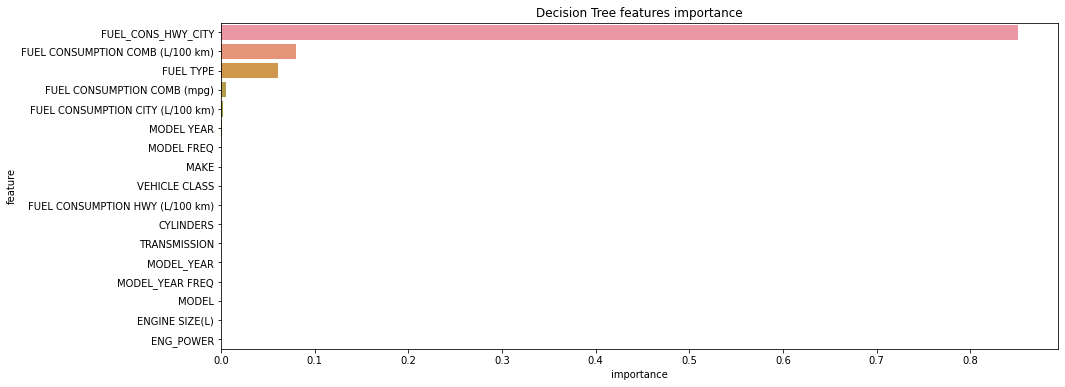

In [ ]:
feature_importance_df = pd.DataFrame(decision_tree.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(15, 6));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('Decision Tree features importance');

### Random Forest Regressor

In [ ]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
RF_prediction = random_forest.predict(X_test)
rf_metrics =evaluate_model(y_test, RF_prediction, "Random Forest")
combined_metrics.append(rf_metrics)
rf_metrics

,Random Forest
R_Squared,0.999322
RMSE,1.643814
MAPE,0.001291
MBE,0.015152
rRMSE,0.638004
MABE,0.313157


In [ ]:
param_grid = {
              "n_estimators": [50,100,200,300],
              'max_depth':[2,3,4,5,6,7,8],
              }
grid = RandomizedSearchCV(RandomForestRegressor(),param_grid, cv=3,scoring="neg_mean_squared_error",refit = True, verbose = 3, n_iter = 5)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END ...max_depth=2, n_estimators=50;, score=-679.357 total time=   0.7s
[CV 2/3] END ...max_depth=2, n_estimators=50;, score=-731.836 total time=   0.7s
[CV 3/3] END ...max_depth=2, n_estimators=50;, score=-711.395 total time=   0.7s
[CV 1/3] END ...max_depth=6, n_estimators=200;, score=-14.826 total time=   7.9s
[CV 2/3] END ...max_depth=6, n_estimators=200;, score=-22.615 total time=   8.1s
[CV 3/3] END ...max_depth=6, n_estimators=200;, score=-17.017 total time=   8.6s
[CV 1/3] END ..max_depth=2, n_estimators=200;, score=-686.318 total time=   2.9s
[CV 2/3] END ..max_depth=2, n_estimators=200;, score=-733.171 total time=   2.9s
[CV 3/3] END ..max_depth=2, n_estimators=200;, score=-705.532 total time=   2.9s
[CV 1/3] END ...max_depth=3, n_estimators=50;, score=-333.305 total time=   1.0s
[CV 2/3] END ...max_depth=3, n_estimators=50;, score=-379.261 total time=   1.3s
[CV 3/3] END ...max_depth=3, n_estimators=50;, sc

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'n_estimators': [50, 100, 200, 300]},
                   scoring='neg_mean_squared_error', verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'n_estimators': 200, 'max_depth': 8}
RandomForestRegressor(max_depth=8, n_estimators=200)


In [ ]:
RF_tuned_prediction = grid.predict(X_test)
RF_tuned_metrics = evaluate_model(y_test,  RF_tuned_prediction, "RandomForest_tuned")
combined_metrics.append(RF_tuned_metrics)
RF_tuned_metrics

,RandomForest_tuned
R_Squared,0.998935
RMSE,2.061107
MAPE,0.004232
MBE,0.044782
rRMSE,0.799966
MABE,1.042440


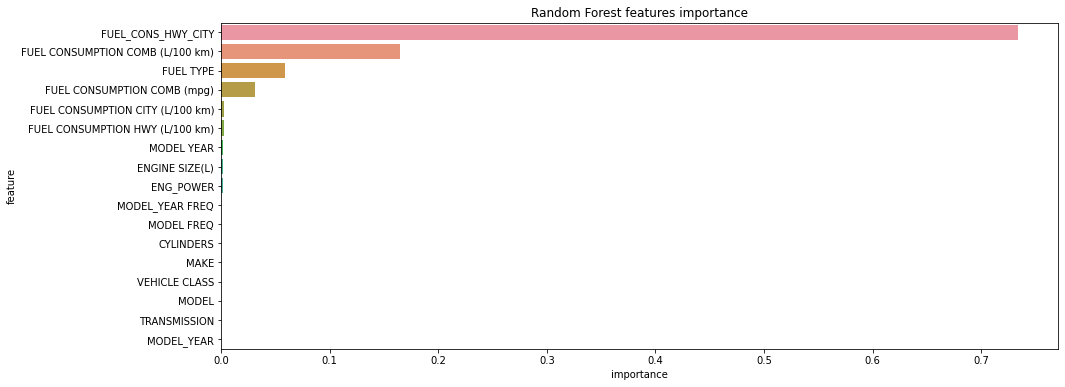

In [ ]:
feature_importance_df = pd.DataFrame(random_forest.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(15, 6));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('Random Forest features importance');

### GredientBoosting Regressor

In [ ]:
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)
GB_prediction = gb_regressor.predict(X_test)

In [ ]:
gb_metrics =evaluate_model(y_test, GB_prediction, "Gradient Boosting Regressor")
combined_metrics.append(gb_metrics)
gb_metrics

,Gradient Boosting Regressor
R_Squared,0.998568
RMSE,2.389828
MAPE,0.006079
MBE,0.032371
rRMSE,0.927551
MABE,1.560029


In [ ]:
param_grid = {
              "n_estimators": [50,100,200,300],
              'max_depth':[2,3,4,5,6,7,8],
              }
grid = RandomizedSearchCV(GradientBoostingRegressor(),param_grid, cv=3,scoring="neg_mean_squared_error",refit = True, verbose = 3, n_iter = 5)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END ....max_depth=7, n_estimators=300;, score=-2.130 total time=  22.4s
[CV 2/3] END ....max_depth=7, n_estimators=300;, score=-3.799 total time=  21.1s
[CV 3/3] END ....max_depth=7, n_estimators=300;, score=-1.902 total time=  22.3s
[CV 1/3] END ...max_depth=2, n_estimators=200;, score=-11.552 total time=   4.1s
[CV 2/3] END ...max_depth=2, n_estimators=200;, score=-11.072 total time=   4.0s
[CV 3/3] END ....max_depth=2, n_estimators=200;, score=-9.162 total time=   5.3s
[CV 1/3] END ....max_depth=3, n_estimators=50;, score=-18.897 total time=   1.5s
[CV 2/3] END ....max_depth=3, n_estimators=50;, score=-21.580 total time=   1.5s
[CV 3/3] END ....max_depth=3, n_estimators=50;, score=-17.692 total time=   1.5s
[CV 1/3] END ....max_depth=7, n_estimators=200;, score=-2.262 total time=  14.3s
[CV 2/3] END ....max_depth=7, n_estimators=200;, score=-3.864 total time=  14.3s
[CV 3/3] END ....max_depth=7, n_estimators=200;, 

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=5,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'n_estimators': [50, 100, 200, 300]},
                   scoring='neg_mean_squared_error', verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'n_estimators': 300, 'max_depth': 7}
GradientBoostingRegressor(max_depth=7, n_estimators=300)


In [ ]:
GB_tuned_prediction = grid.predict(X_test)
GB_tuned_metrics = evaluate_model(y_test,  GB_tuned_prediction, "GBClassifier_tuned")
combined_metrics.append(GB_tuned_metrics)
GB_tuned_metrics

,GBClassifier_tuned
R_Squared,0.999771
RMSE,0.956254
MAPE,0.001474
MBE,-0.006668
rRMSE,0.371146
MABE,0.363530


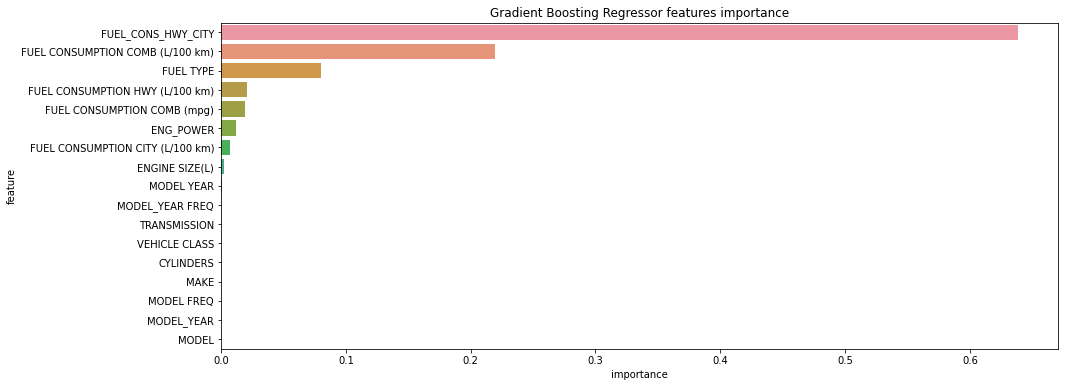

In [ ]:
feature_importance_df = pd.DataFrame(gb_regressor.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(15, 6));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('Gradient Boosting Regressor features importance');

In [ ]:
from xgboost import XGBRegressor

xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y_train)
XGB_prediction = xgb_regressor.predict(X_test)

xgb_metrics =evaluate_model(y_test, XGB_prediction, " XGBoost Regressor")
combined_metrics.append(xgb_metrics)
xgb_metrics

[16:44:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,XGBoost Regressor
R_Squared,0.998586
RMSE,2.374259
MAPE,0.006118
MBE,0.032022
rRMSE,0.921508
MABE,1.576425


In [ ]:
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        "n_estimator": [50, 100,200,300,400]
        }
grid = RandomizedSearchCV(XGBRegressor(),param_grid, cv=5,scoring="neg_mean_squared_error",refit = True, verbose = 3, n_iter = 10)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[16:44:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, n_estimator=200, subsample=0.6;, score=-8.919 total time=   1.1s
[16:44:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, n_estimator=200, subsample=0.6;, score=-11.089 total time=   1.1s
[16:44:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/5] END colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, n_estimator=200, subsample=0.6;, score=-7.189 total time=   1.0s
[16:44:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror

RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimator': [50, 100, 200, 300, 400],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='neg_mean_squared_error', verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'subsample': 0.8, 'n_estimator': 50, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 1, 'colsample_bytree': 1.0}
XGBRegressor(colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5,
             n_estimator=50, subsample=0.8)


In [ ]:
XGB_tuned_prediction = grid.predict(X_test)
XGB_tuned_metrics = evaluate_model(y_test,  XGB_tuned_prediction, "XGBClassifier_tuned")
combined_metrics.append(XGB_tuned_metrics)
XGB_tuned_metrics

,XGBClassifier_tuned
R_Squared,0.999370
RMSE,1.584523
MAPE,0.003297
MBE,0.028638
rRMSE,0.614992
MABE,0.815178


### Models Summary

In [ ]:
from functools import reduce

# Perform as-of merges
_combined_metrics = reduce(lambda left, right:
             left.join(right),
             combined_metrics)
_combined_metrics

,ANN,SVM,SVM_tuned,DNN,Decision Tree,DecisionTree_tuned,Random Forest,RandomForest_tuned,Gradient Boosting Regressor,GBClassifier_tuned,XGBoost Regressor,XGBClassifier_tuned
R_Squared,0.985331,0.953228,0.807778,0.997352,0.999697,0.998780,0.999322,0.998935,0.998568,0.999771,0.998586,0.999370
RMSE,7.647914,13.656148,27.684508,3.249353,1.099744,2.205854,1.643814,2.061107,2.389828,0.956254,2.374259,1.584523
MAPE,0.011595,0.020948,0.066542,0.006192,0.001040,0.006025,0.001291,0.004232,0.006079,0.001474,0.006118,0.003297
MBE,0.730811,1.036619,3.638219,-0.921004,-0.010551,0.000661,0.015152,0.044782,0.032371,-0.006668,0.032022,0.028638
rRMSE,2.968344,5.300287,10.745039,1.261154,0.426838,0.856146,0.638004,0.799966,0.927551,0.371146,0.921508,0.614992
MABE,3.061708,5.658215,17.153231,1.553226,0.259009,1.517527,0.313157,1.042440,1.560029,0.363530,1.576425,0.815178


In [ ]:
_combined_metrics.T

,R_Squared,RMSE,MAPE,MBE,rRMSE,MABE
ANN,0.985331,7.647914,0.011595,0.730811,2.968344,3.061708
SVM,0.953228,13.656148,0.020948,1.036619,5.300287,5.658215
SVM_tuned,0.807778,27.684508,0.066542,3.638219,10.745039,17.153231
DNN,0.997352,3.249353,0.006192,-0.921004,1.261154,1.553226
Decision Tree,0.999697,1.099744,0.001040,-0.010551,0.426838,0.259009
DecisionTree_tuned,0.998780,2.205854,0.006025,0.000661,0.856146,1.517527
Random Forest,0.999322,1.643814,0.001291,0.015152,0.638004,0.313157
RandomForest_tuned,0.998935,2.061107,0.004232,0.044782,0.799966,1.042440
Gradient Boosting Regressor,0.998568,2.389828,0.006079,0.032371,0.927551,1.560029
GBClassifier_tuned,0.999771,0.956254,0.001474,-0.006668,0.371146,0.363530


## Evaluations Summary

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

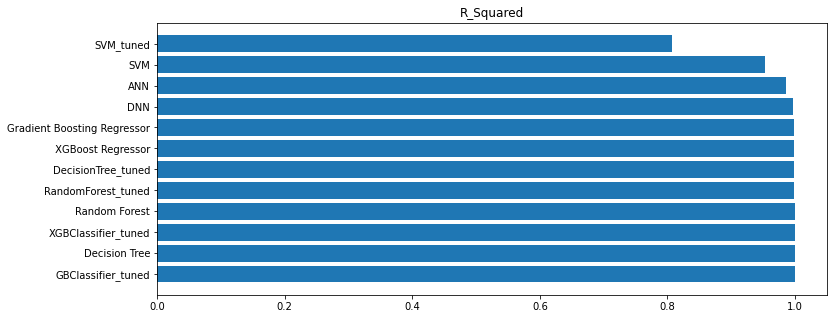

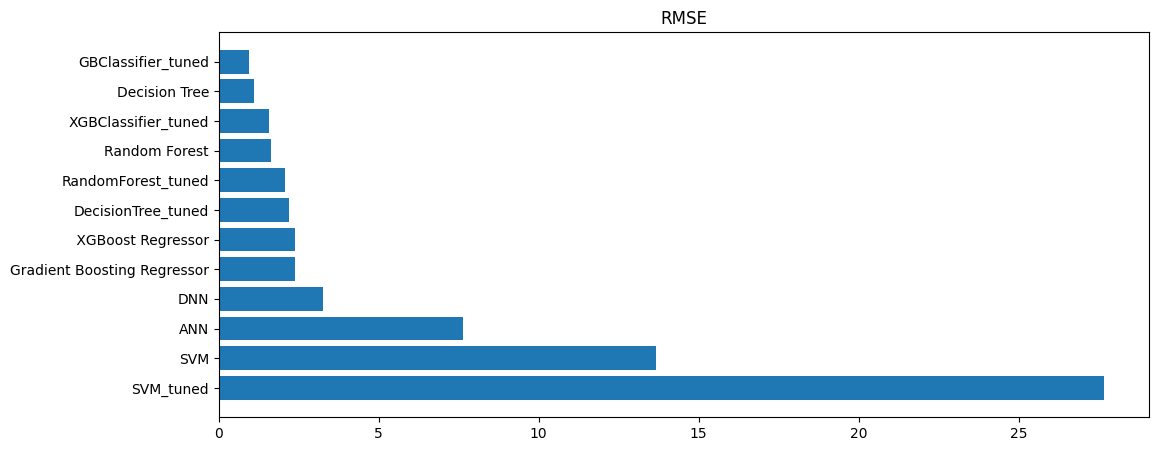

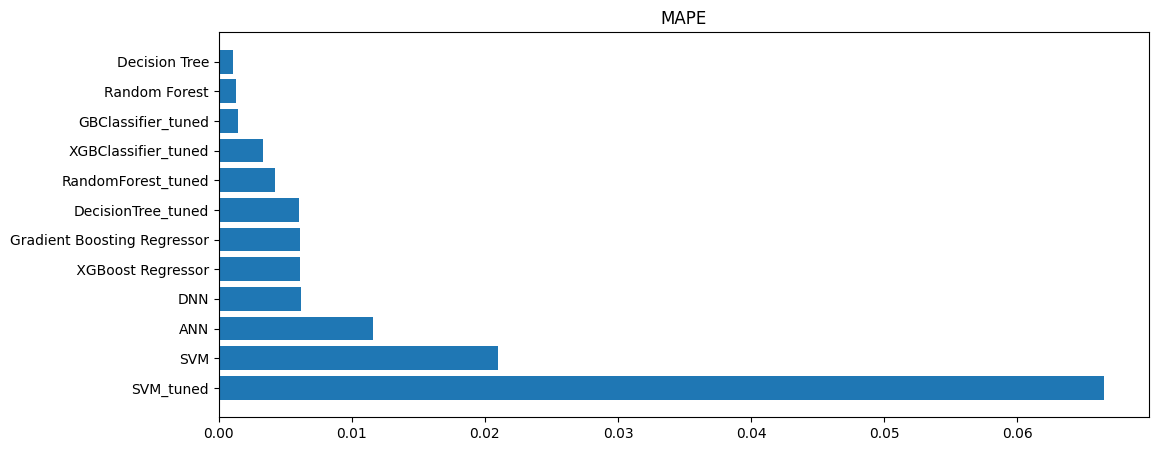

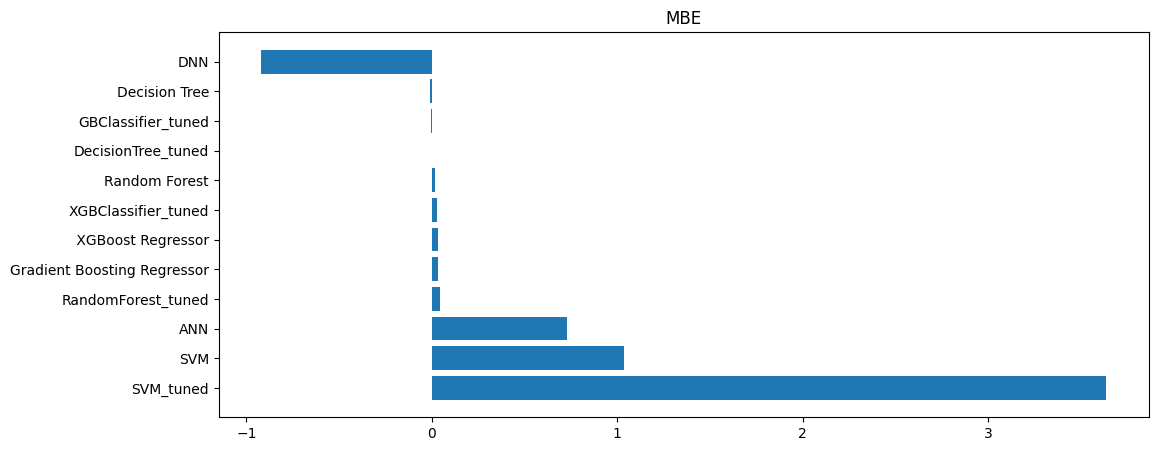

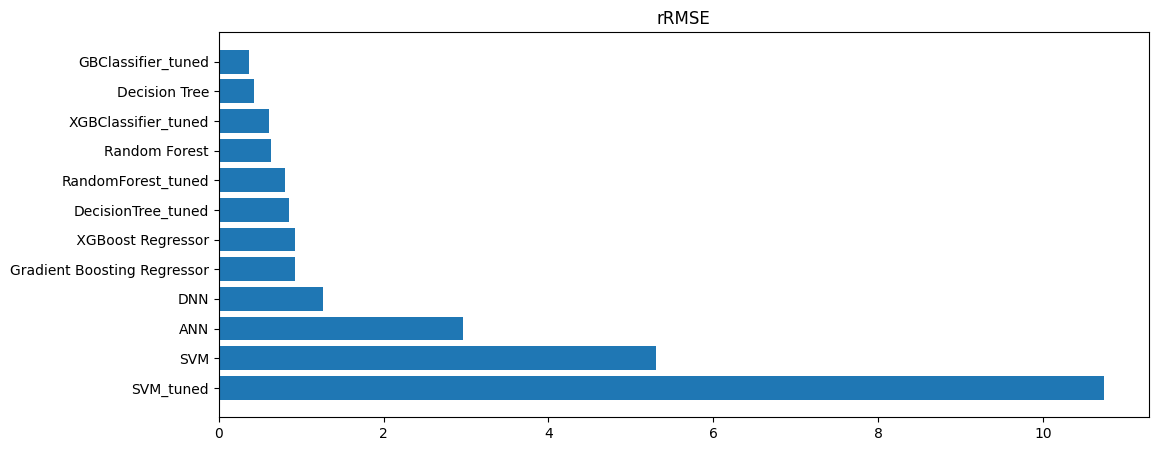

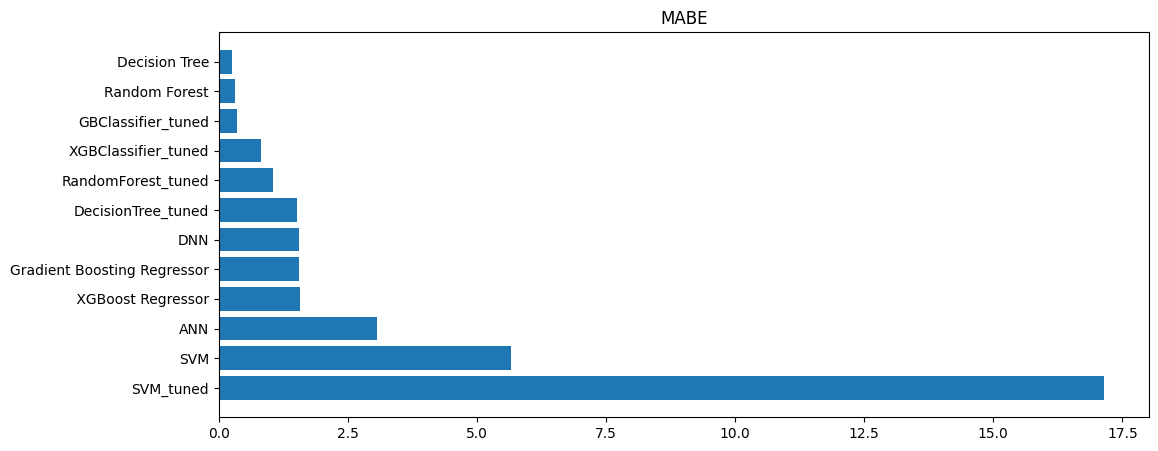

In [ ]:
for col in _combined_metrics.T.columns:
    series = _combined_metrics.T
    df = pd.DataFrame(series[col].sort_values(ascending = False))
    plt.figure(figsize=(12, 5))
    plt.style.use('default')
    plt.barh(df.index,df[col])
    plt.title(col)
    